In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels import regression
from statsmodels.tsa.stattools import coint
import datetime
from dateutil.relativedelta import relativedelta
import matplotlib.pyplot as plt
import seaborn as sb

now_ = datetime.datetime.now()
now = now_.strftime("%Y-%m-%d")
print(now)

months_before_ = datetime.datetime.now() + relativedelta(months=-60)
months_before = months_before_.strftime("%Y-%m-%d")
print(months_before)

start_date = months_before
end_date = now
plt.style.use('seaborn')
plt.rcParams['figure.figsize'] = [20, 12]
plt.rcParams['figure.dpi'] = 200

2020-11-20
2015-11-20


In [2]:
import yfinance as yf
from pandas_datareader import data as pdr

import yfinance as yf
yf.pdr_override() # <== that's all it takes :-)

# download dataframe using pandas_datareader
akbnk = pdr.get_data_yahoo("AKBNK.IS", start=start_date, end=end_date)
ykbnk = pdr.get_data_yahoo("YKBNK.IS", start=start_date, end=end_date)
garan = pdr.get_data_yahoo("GARAN.IS", start=start_date, end=end_date)
isctr = pdr.get_data_yahoo("ISCTR.IS", start=start_date, end=end_date)
vakbn = pdr.get_data_yahoo("VAKBN.IS", start=start_date, end=end_date)
halkb = pdr.get_data_yahoo("HALKB.IS", start=start_date, end=end_date)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [3]:
bank = pd.DataFrame({'akbnk' : akbnk['Close'], 
                       'ykbnk' : ykbnk['Close'],
                     'garan' : garan['Close'],
                     'isctr' : isctr['Close'],
                       })

bank_prices = pd.DataFrame({'akbnk' : akbnk['Close'], 
                       'ykbnk' : ykbnk['Close'],
                     'garan' : garan['Close'],
                     'isctr' : isctr['Close'],
                       })


In [4]:
bank

,akbnk,ykbnk,garan,isctr
Date,,,,
2015-11-20,6.41369,2.37013,7.98,5.16
2015-11-23,6.31937,2.33793,7.75,5.09
2015-11-24,6.07071,2.22844,7.45,4.81
2015-11-25,6.07929,2.24132,7.51,4.85
2015-11-26,5.89065,2.16403,7.24,4.70
...,...,...,...,...
2020-11-13,6.31000,2.90000,8.83,6.91
2020-11-16,6.32000,2.86000,8.95,6.86
2020-11-17,6.00000,2.66000,8.44,6.55


In [5]:
bank = bank.round(2)
bank = bank.pct_change()
bank = bank.dropna()
bank = bank.reset_index(drop=0)
bank = bank.set_index('Date', append=True)

In [6]:
g = globals()
from itertools import chain, combinations
from statsmodels.tsa.vector_ar.vecm import coint_johansen
import statsmodels
import re

def comb_func(columns):
    minimum_combination = 1
    for i in range(minimum_combination, len(columns)+1):
        combination_number = i
        g['long_comb{}'.format(combination_number)] = [] 
        comb = combinations(bank.columns, combination_number) 
        for i in list(comb): 
            g['long_comb{}'.format(combination_number)].append(i) 
        
    for i in range(minimum_combination, len(columns)+1):
        combination_number = i
        g['short_comb{}'.format(combination_number)] = [] 
        comb = combinations(bank.columns, combination_number) 
        for i in list(comb): 
            g['short_comb{}'.format(combination_number)].append(i)
            
    
    g['all_long{}'.format('s')] = []
    for i in range(minimum_combination, len(columns)+1):
        combination_number = i
        g['all_long{}'.format('s')].append(g['long_comb{}'.format(combination_number)])
     
    g['all_short{}'.format('s')] = []
    for i in range(minimum_combination, len(columns)+1):
        combination_number = i
        g['all_short{}'.format('s')].append(g['short_comb{}'.format(combination_number)])
        
        
        
        
    
    for i in range(minimum_combination, len(bank.columns)+1):
        long_comb = i
    
        for j in range(minimum_combination, len(bank.columns)+1):
            short_comb = j
            g['port_{}x{}'.format(long_comb, short_comb)] = []  # to have an empty list of #x# portfolio, we need to create it first


    for i in range(minimum_combination, len(bank.columns)+1):
        long_comb = i
    
        for j in range(minimum_combination, len(bank.columns)+1):
            short_comb = j
        
        # iterate for all j-minimum_combination's combinations in all_longs_week# 
        # the reason for [j-minimum_combination] iteration is that the first #x# type of combination is located in 0 in all_longs_week#
        
            for k in range(len(all_longs[long_comb-minimum_combination])):
                temporary_comb1 = all_longs[long_comb-minimum_combination][k]    # with temporary_comb1 it's possible to memorize the itertion in for example all_longs_week[0]'s first element (5's combinations)  
            
                for z in range(len(all_shorts[short_comb-minimum_combination])):
                    temporary_comb2 = all_shorts[short_comb-minimum_combination][z]   # temporary_comb2 memorizes the short week's specific combination's iterations
                    temporary_comb_ = np.array([ temporary_comb1 , temporary_comb2])       # to keep long-short combinations together in a specific list
                    temporary_comb_ = list(temporary_comb_)
                    temporary_comb_[0]=list(temporary_comb_[0])
                    temporary_comb_[1]=list(temporary_comb_[1])
            
                    g['port_{}x{}'.format(long_comb, short_comb)].append(temporary_comb_) 
                
                
                
    for i in range(minimum_combination, len(bank.columns)+1):
        long_comb = i
    
        for j in range(minimum_combination, len(bank.columns)+1):
            short_comb = j
            for k in range(len(g['port_{}x{}'.format(long_comb, short_comb)])):
                for stock in range(len(g['port_{}x{}'.format(long_comb, short_comb)][k][0])):
                    if g['port_{}x{}'.format(long_comb, short_comb)][k][0][stock] in g['port_{}x{}'.format(long_comb, short_comb)][k][1]:
                        del g['port_{}x{}'.format(long_comb, short_comb)][k][1]
                        break
                
    g['portfolios_to_trad{}'.format('e')] = []
    for i in range(minimum_combination, len(bank.columns)+1):
        long_comb = i
    
        for j in range(minimum_combination, len(bank.columns)+1):
            short_comb = j
            for k in range(len(g['port_{}x{}'.format(long_comb, short_comb)])):
                if len(g['port_{}x{}'.format(long_comb, short_comb)][k]) == 2:
                     g['portfolios_to_trad{}'.format('e')].append(g['port_{}x{}'.format(long_comb, short_comb)][k]) 
    

In [7]:
def backtest_func(portfolios_to_trade, day): 
    for i in range(len(portfolios_to_trade)):
        g['backtest{}'.format(i)] = []
    

    for k in range(len(portfolios_to_trade)):
            portfolio_to_add = portfolios_to_trade[k][0]
            long_portfolio_return = []
            append_func = long_portfolio_return.append
                
            for s in portfolio_to_add:
                return_to_memorize = []
                return_to_memorize.append(bank[s][:day+1])
                append_func(return_to_memorize)
                    

            new_portfolio = []
            append_func = new_portfolio.append
                
            for u in range(len(long_portfolio_return)):
                weighted_stock_return1 = []
                weighted_stock_return1 += [ x/int(len(portfolios_to_trade[k][0])) for x in long_portfolio_return[u]]
                weighted_stock_return = [0]
    
                for i in range(len(weighted_stock_return1)):
                    weighted_stock_return[0] += weighted_stock_return1[i]
                append_func(weighted_stock_return)
                                                          
            last_long_list  = np.zeros( (len(new_portfolio[0]), len(new_portfolio[0][0])) )
            for t in range(len(new_portfolio)):
                last_long_list += new_portfolio[t]
                        
            g['backtest{}'.format(k)].append(last_long_list)
                    
            
    for k in range(len(portfolios_to_trade)):
            portfolio_to_add = portfolios_to_trade[k][1]
            short_portfolio_return = []
            append_func = short_portfolio_return.append
                
            for s in portfolio_to_add:
                return_to_memorize = []
                return_to_memorize.append(bank[s][:day+1])
                append_func(return_to_memorize)
                    

            new_portfolio = []
            append_func = new_portfolio.append
                
            for u in range(len(short_portfolio_return)):
                weighted_stock_return1 = []
                weighted_stock_return1 += [ x/int(len(portfolios_to_trade[k][1])) for x in short_portfolio_return[u]]
                weighted_stock_return = [0]
    
                for i in range(len(weighted_stock_return1)):
                    weighted_stock_return[0] += weighted_stock_return1[i]
                append_func(weighted_stock_return)
                                                          
            last_short_list  = np.zeros( (len(new_portfolio[0]), len(new_portfolio[0][0])) )
            for t in range(len(new_portfolio)):
                last_short_list += new_portfolio[t]
                        
            g['backtest{}'.format(k)].append(last_short_list)
            
            
    for k in range(len(portfolios_to_trade)):
        
        g['backtest_{}'.format(k)] = [0,1]

    for k in range(len(portfolios_to_trade)):
        g['backtest_{}'.format(k)][0] = pd.Series(g['backtest{}'.format(k)][0][0])
        g['backtest_{}'.format(k)][1] = pd.Series(g['backtest{}'.format(k)][1][0])


In [8]:
def forward_func(portfolios_to_trade, day, forward_days):
    for i in range(len(portfolios_to_trade)):
        g['forward{}'.format(i)] = []
    

    for k in range(len(portfolios_to_trade)):
            portfolio_to_add = portfolios_to_trade[k][0]
            g['long_portfolio_return'] = []
            append_func = long_portfolio_return.append
                
            for s in portfolio_to_add:
                return_to_memorize = []
                return_to_memorize.append(bank[s][:day+1+forward_days])
                append_func(return_to_memorize)
                    

            new_portfolio = []
            append_func = new_portfolio.append
                
            for u in range(len(long_portfolio_return)):
                weighted_stock_return1 = []
                weighted_stock_return1 += [ x/int(len(portfolios_to_trade[k][0])) for x in long_portfolio_return[u]]
                weighted_stock_return = [0]
    
                for i in range(len(weighted_stock_return1)):
                    weighted_stock_return[0] += weighted_stock_return1[i]
                append_func(weighted_stock_return)
                                                          
            last_long_list  = np.zeros( (len(new_portfolio[0]), len(new_portfolio[0][0])) )
            for t in range(len(new_portfolio)):
                last_long_list += new_portfolio[t]
                        
            g['forward{}'.format(k)].append(last_long_list)
                    
            
    for k in range(len(portfolios_to_trade)):
            portfolio_to_add = portfolios_to_trade[k][1]
            g['short_portfolio_return'] = []
            append_func = short_portfolio_return.append
                
            for s in portfolio_to_add:
                return_to_memorize = []
                return_to_memorize.append(bank[s][:day+1+forward_days])
                append_func(return_to_memorize)
                    

            new_portfolio = []
            append_func = new_portfolio.append
                
            for u in range(len(short_portfolio_return)):
                weighted_stock_return1 = []
                weighted_stock_return1 += [ x/int(len(portfolios_to_trade[k][1])) for x in short_portfolio_return[u]]
                weighted_stock_return = [0]
    
                for i in range(len(weighted_stock_return1)):
                    weighted_stock_return[0] += weighted_stock_return1[i]
                append_func(weighted_stock_return)
                                                          
            last_short_list  = np.zeros( (len(new_portfolio[0]), len(new_portfolio[0][0])) )
            for t in range(len(new_portfolio)):
                last_short_list += new_portfolio[t]
                        
            g['forward{}'.format(k)].append(last_short_list)
            
            
            
                    
    for k in range(len(portfolios_to_trade)):
        
        g['forward_{}'.format(k)] = [0,1]

    for k in range(len(portfolios_to_trade)):
        g['forward_{}'.format(k)][0] = pd.Series(g['forward{}'.format(k)][0][0])
        g['forward_{}'.format(k)][1] = pd.Series(g['forward{}'.format(k)][1][0])
        

In [9]:
def test_func_regression(portfolios_to_trade):
    
    g['filtered_backtest{}_'.format('s')] = []
    
    for i in range(len(portfolios_to_trade)): 
        
        x = g['backtest_{}'.format(i)][1][-30:]
        y = g['backtest_{}'.format(i)][0][-30:]

        score, pvalue, _ = coint(x, y)
        
        if pvalue <= 0.05:
            x1 = sm.add_constant(x.values)
            y1 = y.values
            model = regression.linear_model.OLS(y1, x1).fit()
            g['beta'] = model.params[1]
            if (beta > 0.75) & (beta < 1.25):
                hedged_port_to_add = g['backtest_{}'.format(i)][0]-beta*g['backtest_{}'.format(i)][1]
                g['filtered_backtest{}_'.format('s')].append(pd.Series(hedged_port_to_add))
                g['filtered_backtest{}_'.format('s')][-1].name = 'backtest_{}'.format(i)
                
                g['filtered_backtest{}'.format('s')] = np.zeros(len(filtered_backtests_))
                g['filtered_backtest{}'.format('s')] = list(g['filtered_backtest{}'.format('s')])
                
                for b in range(len(filtered_backtests_)):
                    g['filtered_backtest{}'.format('s')][b]=np.cumprod(1+filtered_backtests_[b])

In [10]:
def test_func_johansen(portfolios_to_trade):
    
    g['filtered_backtest{}_'.format('s')] = []

    for i in range(len(portfolios_to_trade)): 
        
        x = g['backtest_{}'.format(i)][1][-30:]
        y = g['backtest_{}'.format(i)][0][-30:]
        df = pd.DataFrame({'x':x, 'y':y}) # dataframe of n series for cointegration analysis
        jres = coint_johansen(df, det_order=0, k_ar_diff=1)
        if (jres.lr1[0] > jres.cvt[0][0]) & (jres.lr1[1] > jres.cvt[1][0]) & (jres.lr2[0] > jres.cvm[0][0]) & (jres.lr2[1] > jres.cvm[1][0]):
            g['beta'] = -jres.evec[0][0]/jres.evec[1][0]
            if (beta > 0.75) & (beta < 1.25):
                hedged_port_to_add = g['backtest_{}'.format(i)][0]-beta*g['backtest_{}'.format(i)][1]
                g['filtered_backtest{}_'.format('s')].append(pd.Series(hedged_port_to_add))
                g['filtered_backtest{}_'.format('s')][-1].name = 'backtest_{}'.format(i)
                
                g['filtered_backtest{}'.format('s')] = np.zeros(len(filtered_backtests_))
                g['filtered_backtest{}'.format('s')] = list(g['filtered_backtest{}'.format('s')])
                
                for b in range(len(filtered_backtests_)):
                    g['filtered_backtest{}'.format('s')][b]=np.cumprod(1+filtered_backtests_[b])

In [11]:
def ad_fuller(filtered_backtests, test):
    from statsmodels.tsa.stattools import adfuller
    g['ad_filter'] = []
    append_func=g['ad_filter'].append
    for i in range(len(filtered_backtests)):
        if adfuller(filtered_backtests[i][-test:])[1] <= 0.05:
            append_func(filtered_backtests[i])


In [12]:
def bollinger(ad_filter, rolling_first_criteria, std, std1, rolling_second_criteria, std_long):    
    g['bol_filter'] = []
    append_func = g['bol_filter'].append
    for i in range(len(ad_filter)):
        band = g['ad_filter'][i].rolling(window=rolling_first_criteria).mean()-std*g['ad_filter'][i].rolling(window=rolling_first_criteria).std()
        band1 = g['ad_filter'][i].rolling(window=rolling_first_criteria).mean()-std1*g['ad_filter'][i].rolling(window=rolling_first_criteria).std()
        band2 = g['ad_filter'][i].rolling(window=rolling_second_criteria).mean()-std_long*g['ad_filter'][i].rolling(window=rolling_second_criteria).std()
        
        if g['ad_filter'][i].values[-1] < band[len(band)-1]:
            if g['ad_filter'][i].values[-1] > band1[len(band1)-1]:
                if g['ad_filter'][i].values[-1] < band2[len(band2)-1]:
                    append_func(g['ad_filter'][i])
        


In [13]:
def forward_test_regression(i, take_profit, days_rolling, deviation):
    g['days_rolling'] = days_rolling
    g['take_profit'] = take_profit
    x = g['backtest_{}'.format(i)][1][-30:]
    y = g['backtest_{}'.format(i)][0][-30:]

    x1 = sm.add_constant(x.values)
    y1 = y.values
    model = regression.linear_model.OLS(y1, x1).fit()
    g['beta'] = model.params[1]
    if (beta > 0.75) & (beta < 1.25):
        g['hedged_port_to_add'] = g['backtest_{}'.format(i)][0]-beta*g['backtest_{}'.format(i)][1]
        g['hedged_port_to_add'] = np.cumprod(1 + g['hedged_port_to_add'])

    g['back'] = g['backtest_{}'.format(i)][0][-60:]-beta*g['backtest_{}'.format(i)][1][-60:]
    g['back'] = np.cumprod(1 + g['back'])
    g['back'] = list(g['back'])
    
    tt = g['forward_{}'.format(i)][0][day+1:day+forward_days] - beta*g['forward_{}'.format(i)][1][day+1:day+forward_days]
    tt = list(tt)
    g['forward'] = np.zeros(len(tt))
    g['forward'] = list(g['forward'])
    for i in range(len(tt)):
        if i == 0:
            g['forward'][i] = g['back'][-1]*(1 + tt[i])
        else:
            g['forward'][i] = g['forward'][i-1]*(1 + tt[i])
    
    new = []
    for z in back[-days_rolling:]:
        new.append(z)
    for k in forward:
        new.append(k)
        
    new1 = []
    for z in back[-take_profit:]:
        new1.append(z)
    for k in forward:
        new1.append(k)   
    
    
    forward_ = []    
    for u in forward:
        forward_.append(u)
        
    new = pd.Series(new)
    mean = new.rolling(days_rolling).mean()
    mean = mean.dropna()
    mean = mean[1:]
    std_ = new.rolling(days_rolling).std()
    std_ = std_.dropna()
    std_ = std_[1:]    
    new1=pd.Series(new1)
    
    takeprofit = new1.rolling(take_profit).mean()
    takeprofit = takeprofit.dropna()
    takeprofit = takeprofit[1:]

    rolling_mean = []    
    for e in mean:
        rolling_mean.append(e)
        
    rolling_takeprofit=[]
    for e in takeprofit:
        rolling_takeprofit.append(e)
        
    rolling_std = []
    for y in std_:
        rolling_std.append(y)
    
    g['rolling_mean'] = pd.Series(rolling_mean)
    g['rolling_takeprofit'] = pd.Series(rolling_takeprofit)
    g['rolling_std'] = pd.Series(rolling_std)
    g['forward_'] = pd.Series(forward_)
    g['turn_on'] = 0

    for mean,forward1,std,takes_profit in zip(rolling_mean, forward_, rolling_std, rolling_takeprofit):
        
        band = mean - deviation*std
        if forward1 < band:
            g['turn_on'] = 1
            forward_ = list(forward_)
            g['index'] = forward_.index(forward1)
            g['return1'] = forward_[index]/new[days_rolling-1]-1
            break
        elif forward1 >= takes_profit:
            forward_ = list(forward_)
            g['turn_on'] = 1
            g['index'] = forward_.index(forward1)
            g['return1'] = forward_[index]/new[days_rolling-1]-1
            break

In [14]:
def forward_test_johansen(i, take_profit, days_rolling, deviation):
    
    x = g['backtest_{}'.format(i)][1][-30:]
    y = g['backtest_{}'.format(i)][0][-30:]
    df = pd.DataFrame({'x':x, 'y':y}) # dataframe of n series for cointegration analysis
    jres = coint_johansen(df, det_order=0, k_ar_diff=1)
    if (jres.lr1[0] > jres.cvt[0][0]) & (jres.lr1[1] > jres.cvt[1][0]) & (jres.lr2[0] > jres.cvm[0][0]) & (jres.lr2[1] > jres.cvm[1][0]):
        g['beta'] = -jres.evec[0][0]/jres.evec[1][0]
        if (beta > 0.75) & (beta < 1.25):
            g['hedged_port_to_add'] = g['backtest_{}'.format(i)][0]-beta*g['backtest_{}'.format(i)][1]
            g['hedged_port_to_add'] = np.cumprod(1 + g['hedged_port_to_add'])

    g['back'] = g['backtest_{}'.format(i)][0][-60:]-beta*g['backtest_{}'.format(i)][1][-60:]
    g['back'] = np.cumprod(1 + g['back'])
    g['back'] = list(g['back'])
    
    tt = g['forward_{}'.format(i)][0][day+1:day+forward_days] - beta*g['forward_{}'.format(i)][1][day+1:day+forward_days]
    tt = list(tt)
    g['forward'] = np.zeros(len(tt))
    g['forward'] = list(g['forward'])
    for i in range(len(tt)):
        if i == 0:
            g['forward'][i] = g['back'][-1]*(1 + tt[i])
        else:
            g['forward'][i] = g['forward'][i-1]*(1 + tt[i])
    
    new = []
    for z in back[-days_rolling:]:
        new.append(z)
    for k in forward:
        new.append(k)
        
    new1 = []
    for z in back[-take_profit:]:
        new1.append(z)
    for k in forward:
        new1.append(k)   
    
    
    forward_ = []    
    for u in forward:
        forward_.append(u)
        
    new = pd.Series(new)
    mean = new.rolling(days_rolling).mean()
    mean = mean.dropna()
    mean = mean[1:]
    std_ = new.rolling(days_rolling).std()
    std_ = std_.dropna()
    std_ = std_[1:]    
    new1=pd.Series(new1)
    
    takeprofit = new1.rolling(take_profit).mean()
    takeprofit = takeprofit.dropna()
    takeprofit = takeprofit[1:]

    rolling_mean = []    
    for e in mean:
        rolling_mean.append(e)
        
    rolling_takeprofit=[]
    for e in takeprofit:
        rolling_takeprofit.append(e)
        
    rolling_std = []
    for y in std_:
        rolling_std.append(y)
    
    g['rolling_mean'] = pd.Series(rolling_mean)
    g['rolling_takeprofit'] = pd.Series(rolling_takeprofit)
    g['rolling_std'] = pd.Series(rolling_std)
    g['forward_'] = pd.Series(forward_)
    g['turn_on'] = 0

    for mean,forward1,std,takes_profit in zip(rolling_mean, forward_, rolling_std, rolling_takeprofit):
        
        band = mean - deviation*std
        if forward1 < band:
            g['turn_on'] = 1
            forward_ = list(forward_)
            g['index'] = forward_.index(forward1)
            g['return1'] = forward_[index]/new[days_rolling-1]-1
            break
        elif forward1 >= takes_profit:
            forward_ = list(forward_)
            g['turn_on'] = 1
            g['index'] = forward_.index(forward1)
            g['return1'] = forward_[index]/new[days_rolling-1]-1
            break

In [15]:
def find_index(bol_filter):
    str1 = bol_filter[0].name
    i = re.findall('\d+', str1 )
    g['i'] = i[0]

In [16]:
def plot_func():

    fig, ax = plt.subplots(nrows=2, ncols=1)
    
    hedged_port_to_add[-150:].plot(title = 'backtest{} historical spread'.format(i), ax=ax[0])
    rolling_mean.plot(ax=ax[1], title= 'Forward', label = 'rolling_mean{}'.format(days_rolling))
    forward_.plot(ax=ax[1], label = 'forward_spread')
    rolling_takeprofit.plot(ax=ax[1], label = 'rolling_takeprofit{}'.format(take_profit))
    ax[1].legend(loc='upper right')
    fig.tight_layout()
    

In [17]:
def subs_function(start, end):
        
    all_returns_=[]
    g['return_list'] = []
    days_for_trade_=[]
    total_days_in_hand_=[]
    delete_last=-10
    for day in range(start, end):
        g['day'] = day
        
        if (day == end-1):
            backtest_func(portfolios_to_trade, day)
            forward_func(portfolios_to_trade, day, forward_days)
            test_func_regression(portfolios_to_trade)
            ad_fuller(filtered_backtests, test)
            bollinger(ad_filter, rolling_first_criteria, std, std1, rolling_second_criteria, std_long)
            
            if len(bol_filter) == 0:

                test_func_johansen(portfolios_to_trade)
                ad_fuller(filtered_backtests, test)
                bollinger(ad_filter, rolling_first_criteria, std, std1, rolling_second_criteria, std_long)
                
                if len(bol_filter) == 0:
                    continue
                    
                else:
                    find_index(bol_filter)
                    if (len(portfolios_to_trade[int(i)][0]) <= 2) & (len(portfolios_to_trade[int(i)][1]) <= 2):
                        if (i==delete_last):
                            break
                        else:
                            print('\n\nOpen New Position..')
                            print('Position opened on day: ', day)
                            print('Position opened on time: ', bank.index[day][1].date())
                            print('------------------------------------------------')
                            longs = ''
                            for stock in range(len(portfolios_to_trade[int(i)][0])):
                                if stock>0:
                                    longs += ', {}'.format(portfolios_to_trade[int(i)][0][stock].upper())
                                    longs += '({})'.format(round(bank_prices[portfolios_to_trade[int(i)][0][stock]][day+1],2))
                                else: 
                                    longs += portfolios_to_trade[int(i)][0][stock].upper()
                                    longs += '({})'.format(round(bank_prices[portfolios_to_trade[int(i)][0][stock]][day+1],2))
                            print('   Long stocks: ', longs)
                        
                            shorts = ''
                            for stock in range(len(portfolios_to_trade[int(i)][1])):
                                if stock>0:
                                    shorts += ', {}'.format(portfolios_to_trade[int(i)][1][stock].upper())
                                    shorts += '({})'.format(round(bank_prices[portfolios_to_trade[int(i)][1][stock]][day+1],2))
                                else: 
                                    shorts += portfolios_to_trade[int(i)][1][stock].upper()     
                                    shorts += '({})'.format(round(bank_prices[portfolios_to_trade[int(i)][1][stock]][day+1],2))
                            print('   Short stocks: ', shorts)
                            print('beta: ', round(beta,3))
                            open_email(longs, shorts)
                            break
            
            else:
                find_index(bol_filter)
                if (len(portfolios_to_trade[int(i)][0]) <= 2) & (len(portfolios_to_trade[int(i)][1]) <= 2):
                    if (i==delete_last):
                        break
                    else:
                        print('\n\nOpen New Position..')
                        print('Position opened on day: ', day)
                        print('Position opened on time: ', bank.index[day][1].date())
                        print('------------------------------------------------')
                        longs = ''
                        for stock in range(len(portfolios_to_trade[int(i)][0])):
                            if stock>0:
                                longs += ', {}'.format(portfolios_to_trade[int(i)][0][stock].upper())
                                longs += '({})'.format(round(bank_prices[portfolios_to_trade[int(i)][0][stock]][day+1],2))
                            else: 
                                longs += portfolios_to_trade[int(i)][0][stock].upper()
                                longs += '({})'.format(round(bank_prices[portfolios_to_trade[int(i)][0][stock]][day+1],2))
                        print('   Long stocks: ', longs)
                        
                        shorts = ''
                        for stock in range(len(portfolios_to_trade[int(i)][1])):
                            if stock>0:
                                shorts += ', {}'.format(portfolios_to_trade[int(i)][1][stock].upper())
                                shorts += '({})'.format(round(bank_prices[portfolios_to_trade[int(i)][1][stock]][day+1],2))
                            else: 
                                shorts += portfolios_to_trade[int(i)][1][stock].upper()     
                                shorts += '({})'.format(round(bank_prices[portfolios_to_trade[int(i)][1][stock]][day+1],2))
                        print('   Short stocks: ', shorts)
                        print('beta: ', round(beta,3))
                        open_email(longs, shorts)
                        break

        g['forward_days'] = 60
        backtest_func(portfolios_to_trade, day)
        forward_func(portfolios_to_trade, day, forward_days)
        test_func_regression(portfolios_to_trade)
        ad_fuller(filtered_backtests, test)
        bollinger(ad_filter, rolling_first_criteria, std, std1, rolling_second_criteria, std_long)
    
        if len(bol_filter) == 0:
        
            test_func_johansen(portfolios_to_trade)
            ad_fuller(filtered_backtests, test)
            bollinger(ad_filter, rolling_first_criteria, std, std1, rolling_second_criteria, std_long)
        
            if len(bol_filter) == 0:
                continue
        
            else:
                find_index(bol_filter)
                if (len(portfolios_to_trade[int(i)][0]) <= 2) & (len(portfolios_to_trade[int(i)][1]) <= 2):
                    forward_test_johansen(i, take_profit, days_rolling, deviation)
                    all_returns_.append(return1)
                    days_for_trade_.append(day)
                    total_days_in_hand_.append(index+1)
                
                    if (len(days_for_trade_) ==1):
                        print('\nClose position of recent trade..\n')
                        print('Position opened on day: ', day)
                        print('Position opened on time:, ', bank.index[day][1].date())
                        print('Position closed on day: ', day+index+1)
                        print('Position closed on time: ', bank.index[day+index+1][1].date())
                        stocks_=''
                        print('------------------------------------------------')
                        
                        longs = ''
                        for stock in range(len(portfolios_to_trade[int(i)][0])):
                            if stock>0:
                                longs += ', {}'.format(portfolios_to_trade[int(i)][0][stock].upper())
                                longs += '({})'.format(round(bank_prices[portfolios_to_trade[int(i)][0][stock]][day+index+2],2))
                            else: 
                                longs += portfolios_to_trade[int(i)][0][stock].upper()
                                longs += '({})'.format(round(bank_prices[portfolios_to_trade[int(i)][0][stock]][day+index+2],2))
                        print('   Long stocks: ', longs)
                        
                        shorts = ''
                        for stock in range(len(portfolios_to_trade[int(i)][1])):
                            if stock>0:
                                shorts += ', {}'.format(portfolios_to_trade[int(i)][1][stock].upper())
                                shorts += '({})'.format(round(bank_prices[portfolios_to_trade[int(i)][1][stock]][day+index+2],2))
                            else: 
                                shorts += portfolios_to_trade[int(i)][1][stock].upper()     
                                shorts += '({})'.format(round(bank_prices[portfolios_to_trade[int(i)][1][stock]][day+index+2],2))
                        print('   Short stocks: ', shorts)
                        print('beta: ', round(beta,3))
                        print('total days position stayed open: ', index+1)
                        if return1 > 0:
                            print('      profit for the position :', round(return1,3))
                            return_list.append(return1)
                        if return1 < 0:
                            print('      loss for the position :', round(return1,3))
                            return_list.append(return1)
                        delete_last=i
                    
                        if ((day+index)==(end-1)):
                            close_email(longs, shorts)                         
                        continue
                    
                    if (len(days_for_trade_) > 1):
                
                        if (i == delete_last):
                            days_for_trade_.pop(-1)
                            total_days_in_hand_.pop(-1)
                            all_returns_.pop(-1)  
                            continue
                        
                        elif g['turn_on'] == 1:
                            print('\nClose position of recent trade..\n')
                            print('Position opened on day: ', day)
                            print('Position opened on time: ', bank.index[day][1].date())
                            print('Position closed on day: ', day+index+1)
                            print('Position closed on time: ', bank.index[day+index+1][1].date())
                            print('------------------------------------------------')
                            longs = ''
                            for stock in range(len(portfolios_to_trade[int(i)][0])):
                                if stock>0:
                                    longs += ', {}'.format(portfolios_to_trade[int(i)][0][stock].upper())
                                    longs += '({})'.format(round(bank_prices[portfolios_to_trade[int(i)][0][stock]][day+index+2],2))
                                else: 
                                    longs += portfolios_to_trade[int(i)][0][stock].upper()
                                    longs += '({})'.format(round(bank_prices[portfolios_to_trade[int(i)][0][stock]][day+index+2],2))
                            print('   Long stocks: ', longs)
                        
                            shorts = ''
                            for stock in range(len(portfolios_to_trade[int(i)][1])):
                                if stock>0:
                                    shorts += ', {}'.format(portfolios_to_trade[int(i)][1][stock].upper())
                                    shorts += '({})'.format(round(bank_prices[portfolios_to_trade[int(i)][1][stock]][day+index+2],2))
                                else: 
                                    shorts += portfolios_to_trade[int(i)][1][stock].upper()     
                                    shorts += '({})'.format(round(bank_prices[portfolios_to_trade[int(i)][1][stock]][day+index+2],2))
                            print('   Short stocks: ', shorts)
                            print('beta: ', round(beta,3))
                            print('total days position stayed open: ', index+1)
                            if return1 > 0:
                                print('      profit for the position:', round(return1,3))
                                return_list.append(return1)
                            if return1 < 0:
                                print('      loss for the position:', round(return1,3))
                                return_list.append(return1)
                            delete_last=i
                            
                            if ((day+index)==(end-1)):
                                close_email(longs, shorts) 
                            #plot_func()
            g['bol_filter'] = []
            del g['beta'] 

        else:
            find_index(bol_filter)
            if (len(portfolios_to_trade[int(i)][0]) <= 2) & (len(portfolios_to_trade[int(i)][1]) <= 2):
                forward_test_regression(i, take_profit, days_rolling, deviation)
                all_returns_.append(return1)
                days_for_trade_.append(day)
                total_days_in_hand_.append(index+1)
        
                if (len(days_for_trade_) ==1):  
                
                    print('\nClose position of recent trade..\n')
                    print('Position opened on day: ', day)
                    print('Position opened on time: ', bank.index[day][1].date())
                    print('Position closed on day: ', day+index+1)
                    print('Position closed on time: ', bank.index[day+index+1][1].date())
                    print('------------------------------------------------')
                    longs = ''
                    for stock in range(len(portfolios_to_trade[int(i)][0])):
                        if stock>0:
                            longs += ', {}'.format(portfolios_to_trade[int(i)][0][stock].upper())
                            longs += '({})'.format(round(bank_prices[portfolios_to_trade[int(i)][0][stock]][day+index+2],2))
                        else: 
                            longs += portfolios_to_trade[int(i)][0][stock].upper()
                            longs += '({})'.format(round(bank_prices[portfolios_to_trade[int(i)][0][stock]][day+index+2], 2))
                    print('   Long stocks: ', longs)
                        
                    shorts = ''
                    for stock in range(len(portfolios_to_trade[int(i)][1])):
                        if stock>0:
                            shorts += ', {}'.format(portfolios_to_trade[int(i)][1][stock].upper())
                            shorts += '({})'.format(round(bank_prices[portfolios_to_trade[int(i)][1][stock]][day+index+2], 2))
                        else: 
                            shorts += portfolios_to_trade[int(i)][1][stock].upper()     
                            shorts += '({})'.format(round(bank_prices[portfolios_to_trade[int(i)][1][stock]][day+index+2], 2))
                    print('   Short stocks: ', shorts)
                    print('beta: ', round(beta,3))
                    print('total days position stayed open: ', index+1)
                    if return1 > 0:
                        print('      profit for the position:', round(return1,3))
                        return_list.append(return1)
                    if return1 < 0:
                        print('      loss for the position:', round(return1,3))
                        return_list.append(return1)
                    delete_last=i
                    
                    if ((day+index)==(end-1)):
                        close_email(longs, shorts)                            
                        continue
        
                if (len(days_for_trade_) > 1):
                    if (i == delete_last):
                        days_for_trade_.pop(-1)
                        total_days_in_hand_.pop(-1)
                        all_returns_.pop(-1)   
                        continue
                        
                    elif g['turn_on'] == 1:
                        print('\nClose position of recent trade..\n')
                        print('Position opened on day: ', day)
                        print('Position opened on time: ', bank.index[day][1].date())
                        print('Position closed on day: ', day+index+1)
                        print('Position closed on time: ', bank.index[day+index+1][1].date())
                        print('------------------------------------------------')
                        longs = ''
                        for stock in range(len(portfolios_to_trade[int(i)][0])):
                            if stock>0:
                                longs += ', {}'.format(portfolios_to_trade[int(i)][0][stock].upper())
                                longs += '({})'.format(round(bank_prices[portfolios_to_trade[int(i)][0][stock]][day+index+2], 2))
                            else: 
                                longs += portfolios_to_trade[int(i)][0][stock].upper()
                                longs += '({})'.format(round(bank_prices[portfolios_to_trade[int(i)][0][stock]][day+index+2],2))
                        print('   Long stocks: ', longs)
                        
                        shorts = ''
                        for stock in range(len(portfolios_to_trade[int(i)][1])):
                            if stock>0:
                                shorts += ', {}'.format(portfolios_to_trade[int(i)][1][stock].upper())
                                shorts += '({})'.format(round(bank_prices[portfolios_to_trade[int(i)][1][stock]][day+index+2],2))
                            else: 
                                shorts += portfolios_to_trade[int(i)][1][stock].upper()     
                                shorts += '({})'.format(round(bank_prices[portfolios_to_trade[int(i)][1][stock]][day+index+2],2))
                        print('   Short stocks: ', shorts)
                        print('beta: ', round(beta,3))
                        print('total days position stayed open: ', index+1)
                        if return1 > 0:
                            print('      profit for the position: ', round(return1,3))
                            return_list.append(return1)
                        if return1 < 0:
                            print('      loss for the position: ', round(return1,3))
                            return_list.append(return1)
                        delete_last=i  
                        if ((day+index)==(end-1)):
                            close_email(longs, shorts)
                        #plot_func()
            g['bol_filter'] = []
            del g['beta'] 

In [18]:
def get_prices(start, end):
    g['price'] = pd.DataFrame({'akbnk' : akbnk['Close'], 
                       'ykbnk' : ykbnk['Close'],
                     'garan' : garan['Close'],
                     'isctr' : isctr['Close'],
                       })


In [19]:
def short_allocation(message):
    from math import gcd 
    from functools import reduce
    
    def lcm(denominators):
        return reduce(lambda a,b: a*b // gcd(a,b), denominators)
    
    def myround(x, base=50):
        x = int(x)
        return base * round(x/base)

    before = datetime.datetime.now() + relativedelta(days=-3)
    before = before.strftime("%d/%m/%Y")
    get_prices(before, now)

    g['short_stocks'] = []
    for k in portfolios_to_trade[int(i)][1]:
        short_stocks.append(k)
    
    if len(short_stocks) == 2:
        g['least'] = lcm( [ myround( price[short_stocks[0]][-1]*100 ), myround( price[short_stocks[1]][-1]*100 ) ] )
        g['carpan'] = 1
        if least < 3000:
            for z in range(0, 30):
                if z*least > 8000:
                    g['carpan'] = z
                    break
        
        print('\nShort Allocation')
        print('------------------------------------------')    
        print('Common least: ', least, ' (*{}={})'.format(carpan, carpan*least))
        print(' Contracts for ' + short_stocks[0].upper() + ': ', int(round(least/( price[short_stocks[0]][-1]*100))*carpan), '   (real: {})'.format(round(least/(price[short_stocks[0]][-1]*100),2)*carpan))
        print(' Contracts for ' + short_stocks[1].upper() + ': ', int(round(least/( price[short_stocks[1]][-1]*100))*carpan), '   (real: {})'.format(round(least/(price[short_stocks[1]][-1]*100),2)*carpan))
        print('w_{}/w_{} = {}'.format(short_stocks[0], short_stocks[1], round((int(least/myround( price[short_stocks[0]][-1]*100))*price[short_stocks[0]][-1]*100)/ ( int(least/myround( price[short_stocks[1]][-1]*100))*price[short_stocks[1]][-1]*100), 2) ))
        size = carpan*(int(least/myround( price[short_stocks[0]][-1]*100))*price[short_stocks[0]][-1]*100 + int(least/myround( price[short_stocks[1]][-1]*100))*price[short_stocks[1]][-1]*100)
        print('\nTotal Short Size: ', int(size)) 
        print('\n')
        message += '\nShort Allocation'
        message += '\n------------------------------------------'
        message += '\nCommon least: {}     (*{}={})'.format(least, carpan, carpan*least)
        message += '\n Contracts for {}: {}  (real: {})'.format(short_stocks[0].upper(), int(round(least/( price[short_stocks[0]][-1]*100))*carpan), round(least/(price[short_stocks[0]][-1]*100),2)*carpan)
        message += '\n Contracts for {}: {}  (real: {})'.format(short_stocks[1].upper(), int(round(least/( price[short_stocks[1]][-1]*100))*carpan), round(least/(price[short_stocks[1]][-1]*100),2)*carpan)
        message += '\nw_{}/w_{} = {}'.format(short_stocks[0], short_stocks[1], round((int(least/myround( price[short_stocks[0]][-1]*100))*price[short_stocks[0]][-1]*100)/ ( int(least/myround( price[short_stocks[1]][-1]*100))*price[short_stocks[1]][-1]*100), 2) )
        message += '\n\nTotal Short Size: {}\n'.format(int(size))
        
        g['least'] = size/2

        
    else:
        g['carpan'] = 0
        for z in range(0, 40):
            if z*price[short_stocks[0]][-1]*100 > 7000:
                g['carpan'] = z
                break
        g['least'] = int(price[short_stocks[0]][-1]*100*carpan)
        print('Short Allocation')
        print('------------------------------------------')    
        print('Common least: ', least)
        print(' Contracts for ' + short_stocks[0].upper() + ': ', carpan)
        print('Total Short Size: ', int(least))
        print('\n')
        message += '\nShort Allocation'
        message += '\n------------------------------------------'
        message += '\nCommon least: {}'.format(least)
        message += '\n Contracts for {}: {}'.format(short_stocks[0].upper(), carpan)
        message += '\n\nTotal Short Size: {}'.format(int(least))
        message += '\n'
    g['message2'] = message

In [20]:
def long_allocation(message):
    from math import gcd 
    from functools import reduce
    
    def lcm(denominators):
        return reduce(lambda a,b: a*b // gcd(a,b), denominators)
    
    def myround(x, base=50):
        x = int(x)
        return base * round(x/base)
    
    before = datetime.datetime.now() + relativedelta(days=-3)
    before = before.strftime("%d/%m/%Y")
    get_prices(before, now)
    
    g['long_stocks'] = []
    for k in portfolios_to_trade[int(i)][0]:
        long_stocks.append(k)
        
    
    if (len(short_stocks) == 2) & (len(long_stocks) == 2):
        print('Long Allocation')
        print('------------------------------------------')    
        message += '\n\nLong Allocation'
        message += '\n------------------------------------------'
        
        if (least*beta)/myround( price[long_stocks[0]][-1]*100) > (least*beta)/(price[long_stocks[0]][-1]*100):
            new_contract = int( (least*beta)/( price[long_stocks[0]][-1]*100) )
            kalan = (least*beta)-new_contract*int(( price[long_stocks[0]][-1]*100))
            hisse = int(round(kalan/price[long_stocks[0]][-1]))
            print(' Contracts for ' + long_stocks[0].upper() + ': ', new_contract)
            print(' Stocks for ' + long_stocks[0].upper() + ': ', hisse)
            message += '\n Contracts for {}: {}'.format(long_stocks[0].upper(), new_contract)
            message += '\n Stocks for {}: {}'.format(long_stocks[0].upper(), hisse)
            
        if ((least*beta)/myround( price[long_stocks[0]][-1]*100)) < (least*beta)/(price[long_stocks[0]][-1]*100):
            new_contract = int((least*beta)/(price[long_stocks[0]][-1]*100))
            kalan = (least*beta)-new_contract*int(( price[long_stocks[0]][-1]*100))
            hisse = int(round(kalan/price[long_stocks[0]][-1]))
            print(' Contracts for ' + long_stocks[0].upper() + ': ', new_contract)
            print(' Stocks for ' + long_stocks[0].upper() + ': ', hisse)
            message += '\n Contracts for {}: {}'.format(long_stocks[0].upper(), new_contract)
            message += '\n Stocks for {}: {}'.format(long_stocks[0].upper(), hisse)
        
        if (least*beta)/myround( price[long_stocks[1]][-1]*100) > (least*beta)/(price[long_stocks[1]][-1]*100):
            new_contract = int((least*beta)/(price[long_stocks[1]][-1]*100))
            kalan = (least*beta)-new_contract*int(( price[long_stocks[1]][-1]*100))
            hisse = int(round(kalan/price[long_stocks[1]][-1]))
            print(' Contracts for ' + long_stocks[1].upper() + ': ', new_contract)
            print(' Stocks for ' + long_stocks[1].upper() + ': ', hisse)
            message += '\n Contracts for {}: {}'.format(long_stocks[1].upper(), new_contract)
            message += '\n Stocks for {}: {}'.format(long_stocks[1].upper(), hisse)
            
        if ((least*beta)/myround( price[long_stocks[1]][-1]*100)) < (least*beta)/(price[long_stocks[1]][-1]*100):
            new_contract = int((least*beta)/(price[long_stocks[1]][-1]*100))
            kalan = (least*beta)-new_contract*int(( price[long_stocks[1]][-1]*100))
            hisse = int(round(kalan/price[long_stocks[1]][-1]))
            print(' Contracts for ' + long_stocks[1].upper() + ': ', new_contract)
            print(' Stocks for ' + long_stocks[1].upper() + ': ', hisse)
            message += '\n Contracts for {}: {}'.format(long_stocks[1].upper(), new_contract)
            message += '\n Stocks for {}: {}'.format(long_stocks[1].upper(), hisse)
            
        print('Total Long Size: ', int(least*beta*2))
        message += '\n\nTotal Long Size: {}'.format(int(least*beta*2))
        
    if (len(short_stocks) == 2) & (len(long_stocks) == 1):
        print('Long Allocation')
        print('------------------------------------------')    
        message += '\n\nLong Allocation'
        message += '\n------------------------------------------'
        
        if ((least*beta*2)/myround( price[long_stocks[0]][-1]*100)) > ((least*beta*2)/(price[long_stocks[0]][-1]*100)):
            new_contract = int((least*beta*2)/(price[long_stocks[0]][-1]*100))
            kalan = (least*beta*2)-new_contract*int((price[long_stocks[0]][-1]*100))
            hisse = int(round(kalan/price[long_stocks[0]][-1]))
            print(' Contracts for ' + long_stocks[0].upper() + ': ', new_contract)
            print(' Stocks for ' + long_stocks[0].upper() + ': ', hisse)
            message += '\n Contracts for {}: {}'.format(long_stocks[0].upper(), new_contract)
            message += '\n Stocks for {}: {}'.format(long_stocks[0].upper(), hisse)
            
        if ((least*beta*2)/myround( price[long_stocks[0]][-1]*100)) < ((least*beta*2)/(price[long_stocks[0]][-1]*100)):
            new_contract = int((least*beta*2)/(price[long_stocks[0]][-1]*100))
            kalan = (least*beta*2)-new_contract*int((price[long_stocks[0]][-1]*100))-1
            hisse = int(round(kalan/price[long_stocks[0]][-1]))
            print(' Contracts for ' + long_stocks[0].upper() + ': ', new_contract)
            print(' Stocks for ' + long_stocks[0].upper() + ': ', hisse)
            message += '\n Contracts for {}: {}'.format(long_stocks[0].upper(), new_contract)
            message += '\n Stocks for {}: {}'.format(long_stocks[0].upper(), hisse)
        print('Total Long Size: ', int(least*beta*2))
            
        message += '\n\nTotal Long Size: {}'.format(int(least*beta*2))
    
    if (len(short_stocks) == 1) & (len(long_stocks) == 2):
        print('Long Allocation')
        print('------------------------------------------')    
        message += '\n\nLong Allocation'
        message += '\n------------------------------------------'
        
              
        if ((least*beta/2)/myround( price[long_stocks[0]][-1]*100)) > (least*beta/2)/(price[long_stocks[0]][-1]*100):
            new_contract = int((least*beta/2)/(price[long_stocks[0]][-1]*100))
            kalan = ((least*beta/2))-new_contract*int(( price[long_stocks[0]][-1]*100))
            hisse = int(round(kalan/price[long_stocks[0]][-1]))
            print(' Contracts for ' + long_stocks[0].upper() + ': ', new_contract)
            print(' Stocks for ' + long_stocks[0].upper() + ': ', hisse)
            message += '\n Contracts for {}: {}'.format(long_stocks[0].upper(), new_contract)
            message += '\n Stocks for {}: {}'.format(long_stocks[0].upper(), hisse)
            
        if ((least*beta/2)/myround( price[long_stocks[0]][-1]*100)) < (least*beta/2)/(price[long_stocks[0]][-1]*100):
            new_contract = int((least*beta/2)/(price[long_stocks[0]][-1]*100))
            kalan = (least*beta/2)-new_contract*int(( price[long_stocks[0]][-1]*100))
            hisse = int(round(kalan/price[long_stocks[0]][-1]))
            print(' Contracts for ' + long_stocks[0].upper() + ': ', new_contract)
            print(' Stocks for ' + long_stocks[0].upper() + ': ', hisse)
            message += '\n Contracts for {}: {}'.format(long_stocks[0].upper(), new_contract)
            message += '\n Stocks for {}: {}'.format(long_stocks[0].upper(), hisse)
        
        if ((least*beta/2)/myround( price[long_stocks[1]][-1]*100)) > (least*beta/2)/(price[long_stocks[1]][-1]*100):
            new_contract = int((least*beta/2)/(price[long_stocks[1]][-1]*100))
            kalan = (least*beta/2)-new_contract*int((price[long_stocks[1]][-1]*100))
            hisse = int(round(kalan/price[long_stocks[1]][-1]))
            print(' Contracts for ' + long_stocks[1].upper() + ': ', new_contract)
            print(' Stocks for ' + long_stocks[1].upper() + ': ', hisse)
            message += '\n Contracts for {}: {}'.format(long_stocks[1].upper(), new_contract)
            message += '\n Stocks for {}: {}'.format(long_stocks[1].upper(), hisse)
            
        if ((least*beta/2)/myround( price[long_stocks[1]][-1]*100)) < (least*beta/2)/(price[long_stocks[1]][-1]*100):
            new_contract = int((least*beta/2)/(price[long_stocks[1]][-1]*100))
            kalan = (least*beta/2)-new_contract*int((price[long_stocks[1]][-1]*100))
            hisse = int(round(kalan/price[long_stocks[1]][-1]))
            print(' Contracts for ' + long_stocks[1].upper() + ': ', new_contract)
            print(' Stocks for ' + long_stocks[1].upper() + ': ', hisse)
            message += '\n Contracts for {}: {}'.format(long_stocks[1].upper(), new_contract)
            message += '\n Stocks for {}: {}'.format(long_stocks[1].upper(), hisse)
        print('Total Long Size: ', int(least*beta))
            
        message += '\n\nTotal Long Size: {}'.format(int(least*beta))
    if (len(short_stocks) == 1) & (len(long_stocks) == 1):
        print('Long Allocation')
        print('------------------------------------------')    
        message += '\n\nLong Allocation'
        message += '\n------------------------------------------'
        
        if ((least*beta)/myround( price[long_stocks[0]][-1]*100)) > ((least*beta)/(price[long_stocks[0]][-1]*100)):
            new_contract = int((least*beta)/myround(price[long_stocks[0]][-1]*100))
            kalan = (least*beta)-new_contract*int((price[long_stocks[0]][-1]*100))
            hisse = int(round(kalan/price[long_stocks[0]][-1]))
            print(' Contracts for ' + long_stocks[0].upper() + ': ', new_contract)
            print(' Stocks for ' + long_stocks[0].upper() + ': ', hisse)
            message += '\n Contracts for {}: {}'.format(long_stocks[0].upper(), new_contract)
            message += '\n Stocks for {}: {}'.format(long_stocks[0].upper(), hisse)
        
        else:
            new_contract = int((least*beta)/myround( price[long_stocks[0]][-1]*100))
            kalan = (least*beta)-new_contract*int((price[long_stocks[0]][-1]*100))
            hisse = int(round(kalan/price[long_stocks[0]][-1]))
            print(' Contracts for ' + long_stocks[0].upper() + ': ', new_contract)
            print(' Stocks for ' + long_stocks[0].upper() + ': ', hisse)
            message += '\n Contracts for {}: {}'.format(long_stocks[0].upper(), new_contract)
            message += '\n Stocks for {}: {}'.format(long_stocks[0].upper(), hisse)
        print('Total Long Size: ', int(least*beta))
        
        message += '\n\nTotal Long Size: {}'.format(int(least*beta))
    g['message3'] = message

In [21]:
def close_email(longs, shorts): 
    #message = 'Subject: Close Position'
    #message += '\nClose position of recent trade..\n'
    #message += '\nPosition opened on day: {}'.format(bank.index[day][1].date())
    #message += '\nPosition closed on day: {}'.format(bank.index[day+index][1].date())
    #message += '\n------------------------------------------'
    #message += '\n   Long stocks: {}'.format(longs)
    #message += '\n   Short stocks: {}'.format(shorts)
    #message += '\nbeta: {}'.format(round(beta,3))
    #message += '\ntotal days position stayed open: {}'.format(index)
    #if return1 > 0:
     #   message += '\n     profit: {} %'.format(round(return1,4)*100)
    #if return1 < 0:
     #   message += '\n     loss: {} %'.format(round(return1,4)*100)
        
    #import smtplib
    #sender_email = "   "
    #rec_email = "   "
    #password = "   "
    #server = smtplib.SMTP('smtp.gmail.com', 587)
    #server.starttls()
    #server.login(sender_email, password)
    #server.sendmail(sender_email, rec_email, message)
    pass
    

In [22]:
def open_email(longs, shorts):
    message1 = 'Subject: Open Position'
    message1 += '\n'
    message1 += '\nPosition opened on time: {}'.format(bank.index[day][1].date())
    message1 += '\n------------------------------------------'
    message1 += '\n   Long stocks: {}'.format(longs)
    message1 += '\n   Short stocks: {}'.format(shorts)  
    message1 += '\nbeta: {}\n\n'.format(round(beta,5))
    short_allocation(message1)
    long_allocation(message2)
    #import smtplib
    #sender_email = "   "
    #rec_email = "   "
    #password = "   "
    #server = smtplib.SMTP('smtp.gmail.com', 587)
    #server.starttls()
    #server.login(sender_email, password)
    #server.sendmail(sender_email, rec_email, message3)
    pass

In [24]:
comb_func(bank.columns)
test = 60
rolling_first_criteria= 20
std= 1
std1= 1.8
rolling_second_criteria= 20
std_long= 0
take_profit= 30
days_rolling= 20
deviation= 2.2
subs_function(len(bank)-1200, len(bank))



Close position of recent trade..

Position opened on day:  94
Position opened on time:  2016-04-01
Position closed on day:  108
Position closed on time:  2016-04-21
------------------------------------------------
   Long stocks:  YKBNK(2.77), ISCTR(4.95)
   Short stocks:  AKBNK(7.32), GARAN(8.65)
beta:  0.761
total days position stayed open:  14
      profit for the position: 0.013

Close position of recent trade..

Position opened on day:  106
Position opened on time:  2016-04-19
Position closed on day:  107
Position closed on time:  2016-04-20
------------------------------------------------
   Long stocks:  GARAN(8.74), ISCTR(4.94)
   Short stocks:  AKBNK(7.3), YKBNK(2.74)
beta:  1.168
total days position stayed open:  1
      profit for the position: 0.017

Close position of recent trade..

Position opened on day:  107
Position opened on time:  2016-04-20
Position closed on day:  109
Position closed on time:  2016-04-22
------------------------------------------------
   Long sto


Close position of recent trade..

Position opened on day:  210
Position opened on time:  2016-09-12
Position closed on day:  222
Position closed on time:  2016-09-28
------------------------------------------------
   Long stocks:  AKBNK(7.13)
   Short stocks:  YKBNK(2.42), GARAN(8.18)
beta:  0.931
total days position stayed open:  12
      profit for the position:  0.015

Close position of recent trade..

Position opened on day:  219
Position opened on time:  2016-09-23
Position closed on day:  226
Position closed on time:  2016-10-04
------------------------------------------------
   Long stocks:  GARAN(8.03), ISCTR(4.79)
   Short stocks:  AKBNK(6.94), YKBNK(2.33)
beta:  0.94
total days position stayed open:  7
      profit for the position:  0.011

Close position of recent trade..

Position opened on day:  220
Position opened on time:  2016-09-26
Position closed on day:  222
Position closed on time:  2016-09-28
------------------------------------------------
   Long stocks:  AKBN


Close position of recent trade..

Position opened on day:  303
Position opened on time:  2017-01-19
Position closed on day:  310
Position closed on time:  2017-01-30
------------------------------------------------
   Long stocks:  YKBNK(2.54)
   Short stocks:  GARAN(8.24), ISCTR(5.97)
beta:  1.006
total days position stayed open:  7
      profit for the position:  0.068

Close position of recent trade..

Position opened on day:  304
Position opened on time:  2017-01-20
Position closed on day:  310
Position closed on time:  2017-01-30
------------------------------------------------
   Long stocks:  YKBNK(2.54)
   Short stocks:  AKBNK(7.15), ISCTR(5.97)
beta:  0.994
total days position stayed open:  6
      profit for the position:  0.06

Close position of recent trade..

Position opened on day:  305
Position opened on time:  2017-01-23
Position closed on day:  310
Position closed on time:  2017-01-30
------------------------------------------------
   Long stocks:  YKBNK(2.54)
   Sho


Close position of recent trade..

Position opened on day:  366
Position opened on time:  2017-04-18
Position closed on day:  367
Position closed on time:  2017-04-19
------------------------------------------------
   Long stocks:  AKBNK(7.82), GARAN(9.52)
   Short stocks:  YKBNK(2.72)
beta:  0.987
total days position stayed open:  1
      loss for the position:  -0.022

Close position of recent trade..

Position opened on day:  369
Position opened on time:  2017-04-21
Position closed on day:  370
Position closed on time:  2017-04-24
------------------------------------------------
   Long stocks:  GARAN(9.54)
   Short stocks:  YKBNK(2.81)
beta:  0.952
total days position stayed open:  1
      loss for the position:  -0.031

Close position of recent trade..

Position opened on day:  373
Position opened on time:  2017-04-27
Position closed on day:  401
Position closed on time:  2017-06-06
------------------------------------------------
   Long stocks:  GARAN(9.61)
   Short stocks:  YK


Close position of recent trade..

Position opened on day:  489
Position opened on time:  2017-10-06
Position closed on day:  493
Position closed on time:  2017-10-12
------------------------------------------------
   Long stocks:  AKBNK(8.31)
   Short stocks:  ISCTR(6.88)
beta:  0.794
total days position stayed open:  4
      profit for the position:  0.026

Close position of recent trade..

Position opened on day:  495
Position opened on time:  2017-10-16
Position closed on day:  503
Position closed on time:  2017-10-26
------------------------------------------------
   Long stocks:  AKBNK(8.26)
   Short stocks:  GARAN(9.84), ISCTR(6.91)
beta:  1.184
total days position stayed open:  8
      profit for the position: 0.022

Close position of recent trade..

Position opened on day:  501
Position opened on time:  2017-10-24
Position closed on day:  503
Position closed on time:  2017-10-26
------------------------------------------------
   Long stocks:  AKBNK(8.26)
   Short stocks:  I


Close position of recent trade..

Position opened on day:  529
Position opened on time:  2017-12-01
Position closed on day:  535
Position closed on time:  2017-12-11
------------------------------------------------
   Long stocks:  AKBNK(8.02), GARAN(10.1)
   Short stocks:  YKBNK(2.75), ISCTR(6.68)
beta:  0.848
total days position stayed open:  6
      profit for the position: 0.011

Close position of recent trade..

Position opened on day:  530
Position opened on time:  2017-12-04
Position closed on day:  553
Position closed on time:  2018-01-04
------------------------------------------------
   Long stocks:  YKBNK(2.84)
   Short stocks:  GARAN(10.52), ISCTR(6.93)
beta:  0.814
total days position stayed open:  23
      profit for the position:  0.002

Close position of recent trade..

Position opened on day:  531
Position opened on time:  2017-12-05
Position closed on day:  536
Position closed on time:  2017-12-12
------------------------------------------------
   Long stocks:  AKB


Close position of recent trade..

Position opened on day:  574
Position opened on time:  2018-02-02
Position closed on day:  578
Position closed on time:  2018-02-08
------------------------------------------------
   Long stocks:  AKBNK(8.7)
   Short stocks:  GARAN(11.7)
beta:  0.779
total days position stayed open:  4
      loss for the position:  -0.027

Close position of recent trade..

Position opened on day:  576
Position opened on time:  2018-02-06
Position closed on day:  577
Position closed on time:  2018-02-07
------------------------------------------------
   Long stocks:  YKBNK(3.01), ISCTR(7.52)
   Short stocks:  AKBNK(8.92)
beta:  0.954
total days position stayed open:  1
      profit for the position: 0.031

Close position of recent trade..

Position opened on day:  577
Position opened on time:  2018-02-07
Position closed on day:  578
Position closed on time:  2018-02-08
------------------------------------------------
   Long stocks:  AKBNK(8.7)
   Short stocks:  GARA


Close position of recent trade..

Position opened on day:  690
Position opened on time:  2018-07-16
Position closed on day:  697
Position closed on time:  2018-07-25
------------------------------------------------
   Long stocks:  YKBNK(2.12)
   Short stocks:  AKBNK(6.01)
beta:  0.8
total days position stayed open:  7
      loss for the position: -0.051

Close position of recent trade..

Position opened on day:  692
Position opened on time:  2018-07-18
Position closed on day:  697
Position closed on time:  2018-07-25
------------------------------------------------
   Long stocks:  YKBNK(2.12), GARAN(7.02)
   Short stocks:  AKBNK(6.01), ISCTR(4.98)
beta:  1.078
total days position stayed open:  5
      loss for the position: -0.025

Close position of recent trade..

Position opened on day:  693
Position opened on time:  2018-07-19
Position closed on day:  697
Position closed on time:  2018-07-25
------------------------------------------------
   Long stocks:  YKBNK(2.12)
   Short st


Close position of recent trade..

Position opened on day:  894
Position opened on time:  2019-04-26
Position closed on day:  907
Position closed on time:  2019-05-15
------------------------------------------------
   Long stocks:  AKBNK(5.77), ISCTR(5.06)
   Short stocks:  YKBNK(1.93)
beta:  1.003
total days position stayed open:  13
      profit for the position: 0.027

Close position of recent trade..

Position opened on day:  899
Position opened on time:  2019-05-03
Position closed on day:  910
Position closed on time:  2019-05-20
------------------------------------------------
   Long stocks:  AKBNK(5.75), ISCTR(5.02)
   Short stocks:  GARAN(7.49)
beta:  0.843
total days position stayed open:  11
      profit for the position:  0.031

Close position of recent trade..

Position opened on day:  904
Position opened on time:  2019-05-10
Position closed on day:  907
Position closed on time:  2019-05-15
------------------------------------------------
   Long stocks:  AKBNK(5.77)
   S


Close position of recent trade..

Position opened on day:  949
Position opened on time:  2019-07-12
Position closed on day:  956
Position closed on time:  2019-07-23
------------------------------------------------
   Long stocks:  GARAN(9.84)
   Short stocks:  AKBNK(7.7), ISCTR(6.31)
beta:  0.976
total days position stayed open:  7
      profit for the position:  0.018

Close position of recent trade..

Position opened on day:  951
Position opened on time:  2019-07-16
Position closed on day:  966
Position closed on time:  2019-08-06
------------------------------------------------
   Long stocks:  AKBNK(7.43), GARAN(9.74)
   Short stocks:  YKBNK(2.62)
beta:  0.837
total days position stayed open:  15
      profit for the position:  0.015

Close position of recent trade..

Position opened on day:  954
Position opened on time:  2019-07-19
Position closed on day:  962
Position closed on time:  2019-07-31
------------------------------------------------
   Long stocks:  GARAN(9.84)
   Sh


Close position of recent trade..

Position opened on day:  1042
Position opened on time:  2019-11-21
Position closed on day:  1044
Position closed on time:  2019-11-25
------------------------------------------------
   Long stocks:  YKBNK(2.44)
   Short stocks:  AKBNK(7.69), GARAN(9.94)
beta:  0.8
total days position stayed open:  2
      loss for the position:  -0.013

Close position of recent trade..

Position opened on day:  1043
Position opened on time:  2019-11-22
Position closed on day:  1044
Position closed on time:  2019-11-25
------------------------------------------------
   Long stocks:  YKBNK(2.44)
   Short stocks:  AKBNK(7.69)
beta:  0.85
total days position stayed open:  1
      loss for the position:  -0.016

Close position of recent trade..

Position opened on day:  1044
Position opened on time:  2019-11-25
Position closed on day:  1048
Position closed on time:  2019-11-29
------------------------------------------------
   Long stocks:  YKBNK(2.39)
   Short stocks: 


Close position of recent trade..

Position opened on day:  1109
Position opened on time:  2020-02-25
Position closed on day:  1113
Position closed on time:  2020-03-02
------------------------------------------------
   Long stocks:  GARAN(9.58), ISCTR(5.81)
   Short stocks:  AKBNK(6.88), YKBNK(2.39)
beta:  0.876
total days position stayed open:  4
      loss for the position: -0.023

Close position of recent trade..

Position opened on day:  1111
Position opened on time:  2020-02-27
Position closed on day:  1113
Position closed on time:  2020-03-02
------------------------------------------------
   Long stocks:  GARAN(9.58)
   Short stocks:  AKBNK(6.88), ISCTR(5.81)
beta:  0.898
total days position stayed open:  2
      loss for the position:  -0.02

Close position of recent trade..

Position opened on day:  1125
Position opened on time:  2020-03-18
Position closed on day:  1126
Position closed on time:  2020-03-19
------------------------------------------------
   Long stocks:  AK


Close position of recent trade..

Position opened on day:  1189
Position opened on time:  2020-06-23
Position closed on day:  1193
Position closed on time:  2020-06-29
------------------------------------------------
   Long stocks:  GARAN(8.51)
   Short stocks:  AKBNK(6.11)
beta:  0.988
total days position stayed open:  4
      profit for the position:  0.009

Close position of recent trade..

Position opened on day:  1197
Position opened on time:  2020-07-03
Position closed on day:  1198
Position closed on time:  2020-07-06
------------------------------------------------
   Long stocks:  AKBNK(6.1)
   Short stocks:  GARAN(8.38), ISCTR(5.47)
beta:  0.942
total days position stayed open:  1
      profit for the position:  0.016

Close position of recent trade..

Position opened on day:  1205
Position opened on time:  2020-07-16
Position closed on day:  1213
Position closed on time:  2020-07-29
------------------------------------------------
   Long stocks:  GARAN(7.1)
   Short stock


Close position of recent trade..

Position opened on day:  1271
Position opened on time:  2020-10-22
Position closed on day:  1290
Position closed on time:  2020-11-19
------------------------------------------------
   Long stocks:  AKBNK(6.47), GARAN(9.52)
   Short stocks:  ISCTR(6.91)
beta:  0.972
total days position stayed open:  19
      profit for the position:  0.037

Close position of recent trade..

Position opened on day:  1272
Position opened on time:  2020-10-23
Position closed on day:  1290
Position closed on time:  2020-11-19
------------------------------------------------
   Long stocks:  AKBNK(6.47)
   Short stocks:  ISCTR(6.91)
beta:  0.903
total days position stayed open:  18
      profit for the position:  0.022

Close position of recent trade..

Position opened on day:  1273
Position opened on time:  2020-10-26
Position closed on day:  1276
Position closed on time:  2020-10-30
------------------------------------------------
   Long stocks:  AKBNK(4.78)
   Short s

In [25]:
returns = np.cumprod(1+(pd.Series(return_list)))

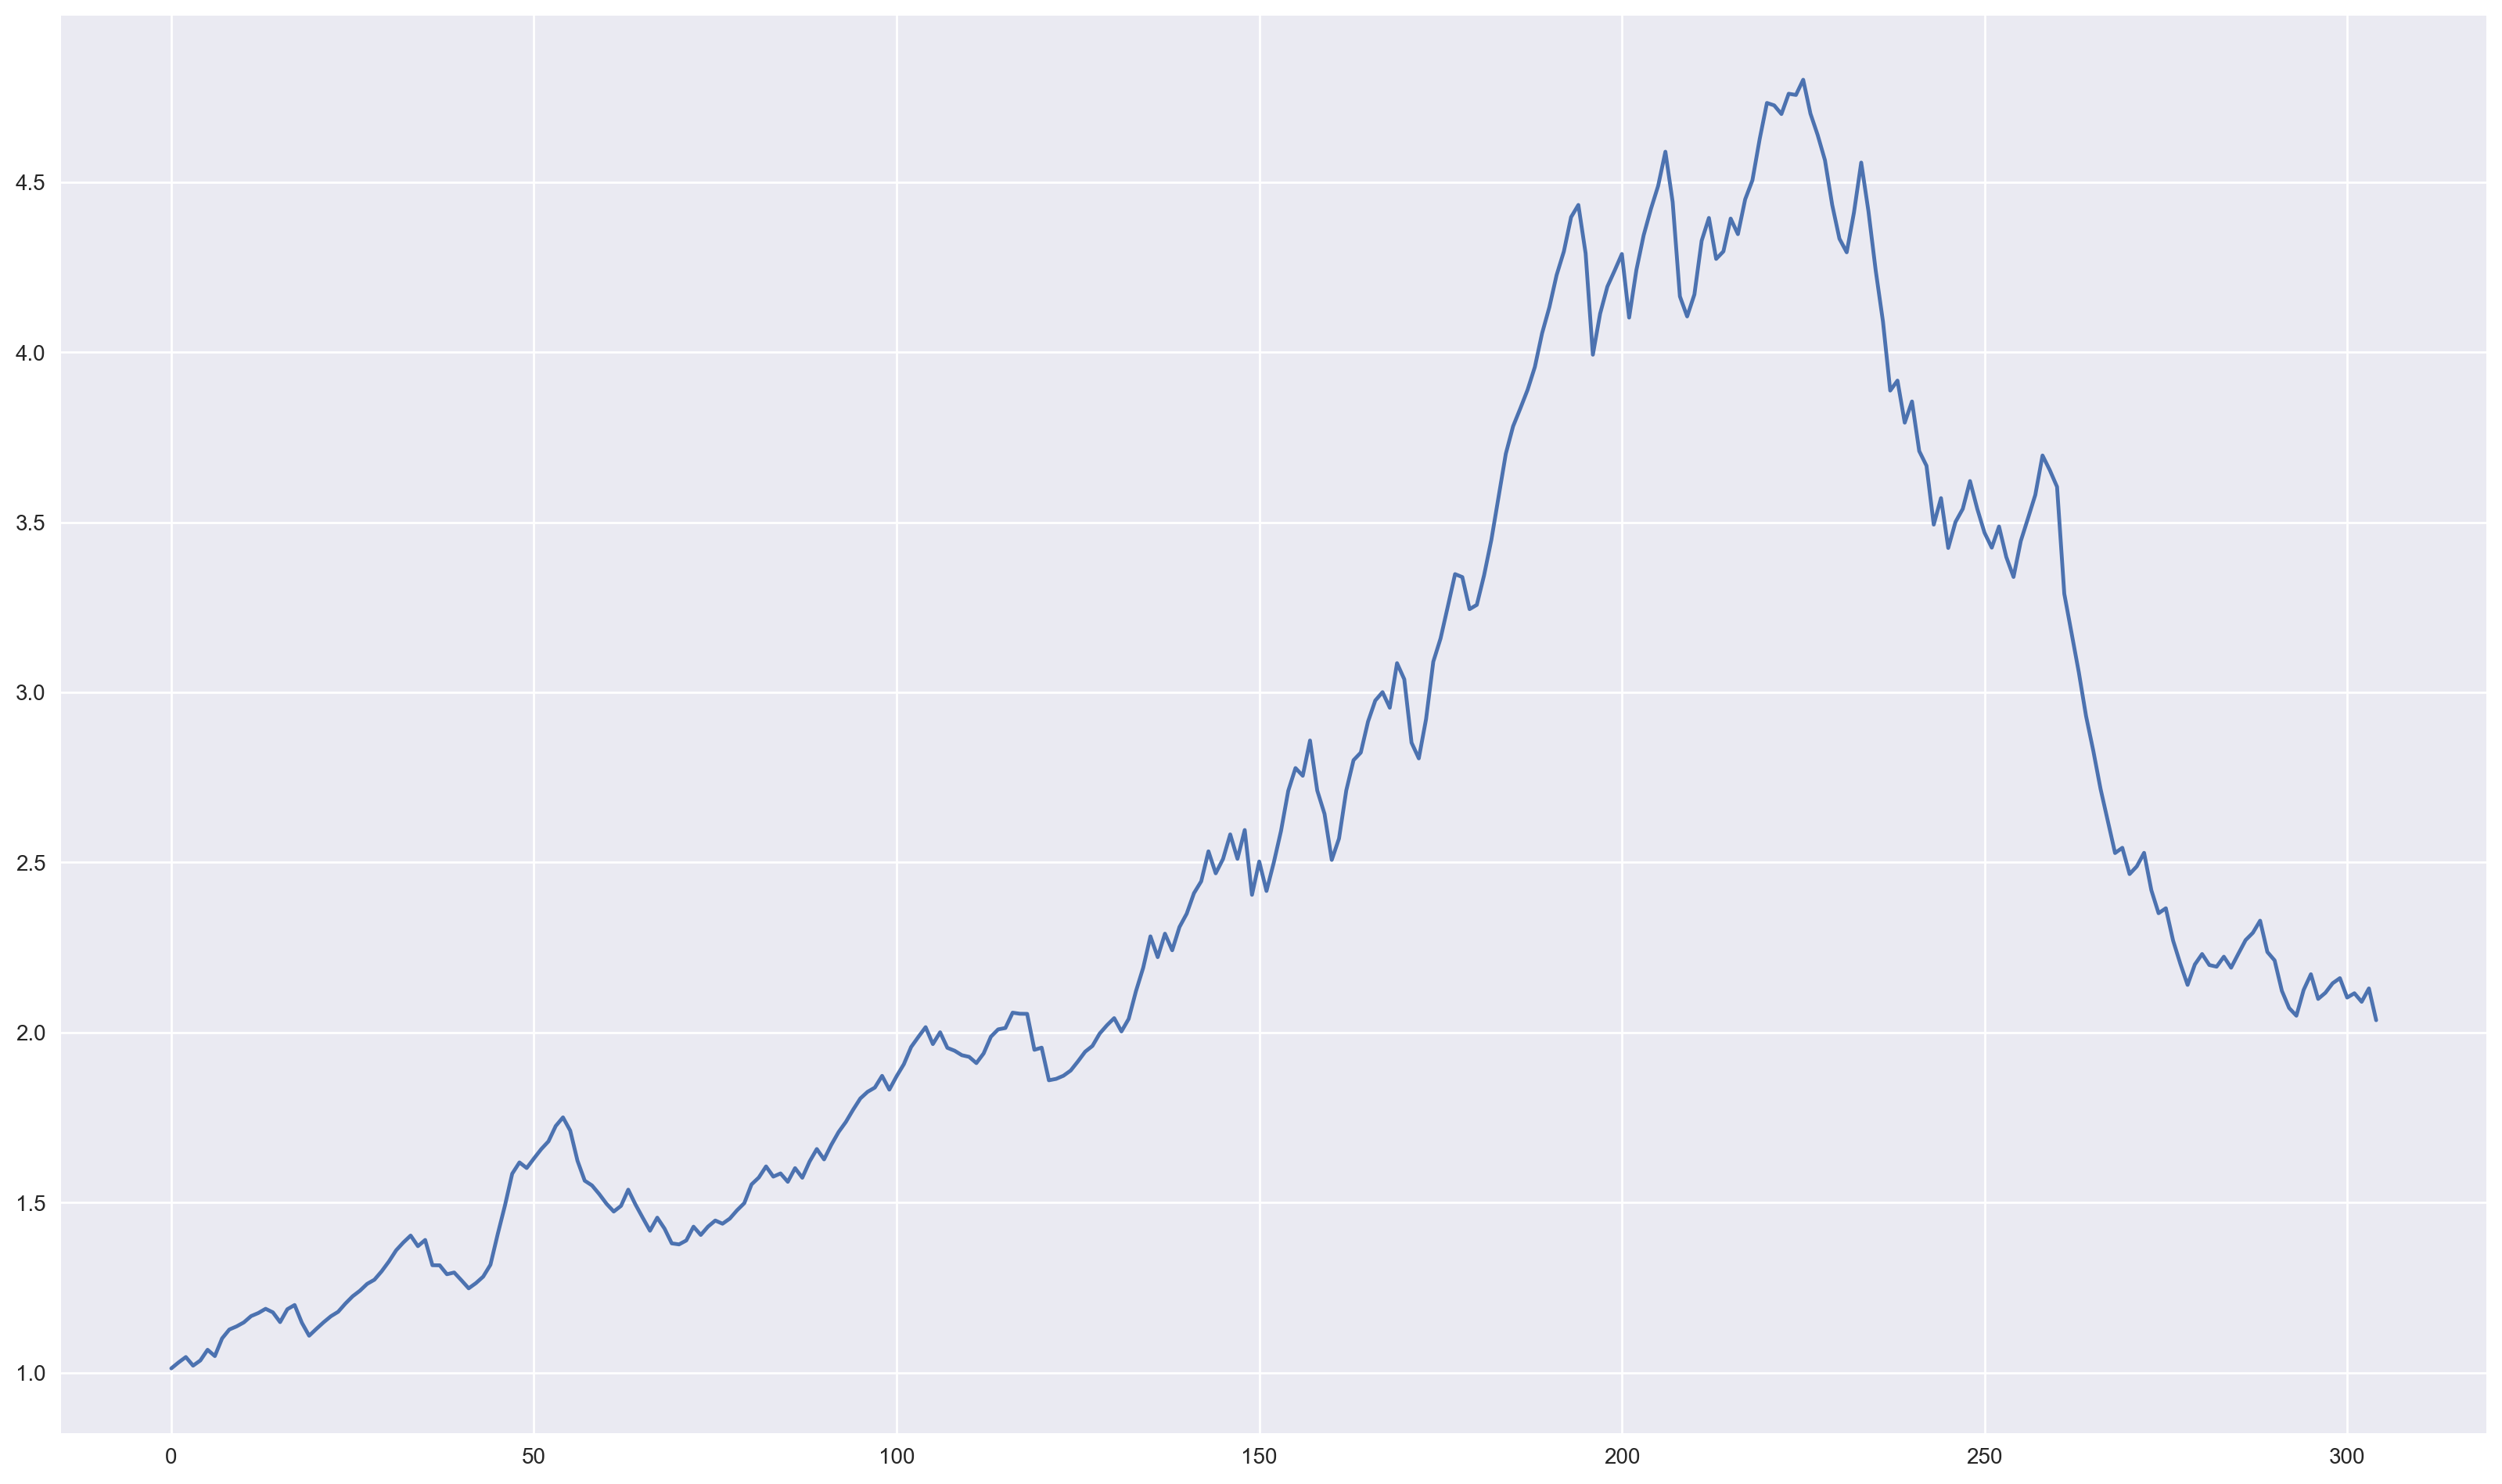

In [28]:
returns.plot()  #strategy stopped working in the last 1 year

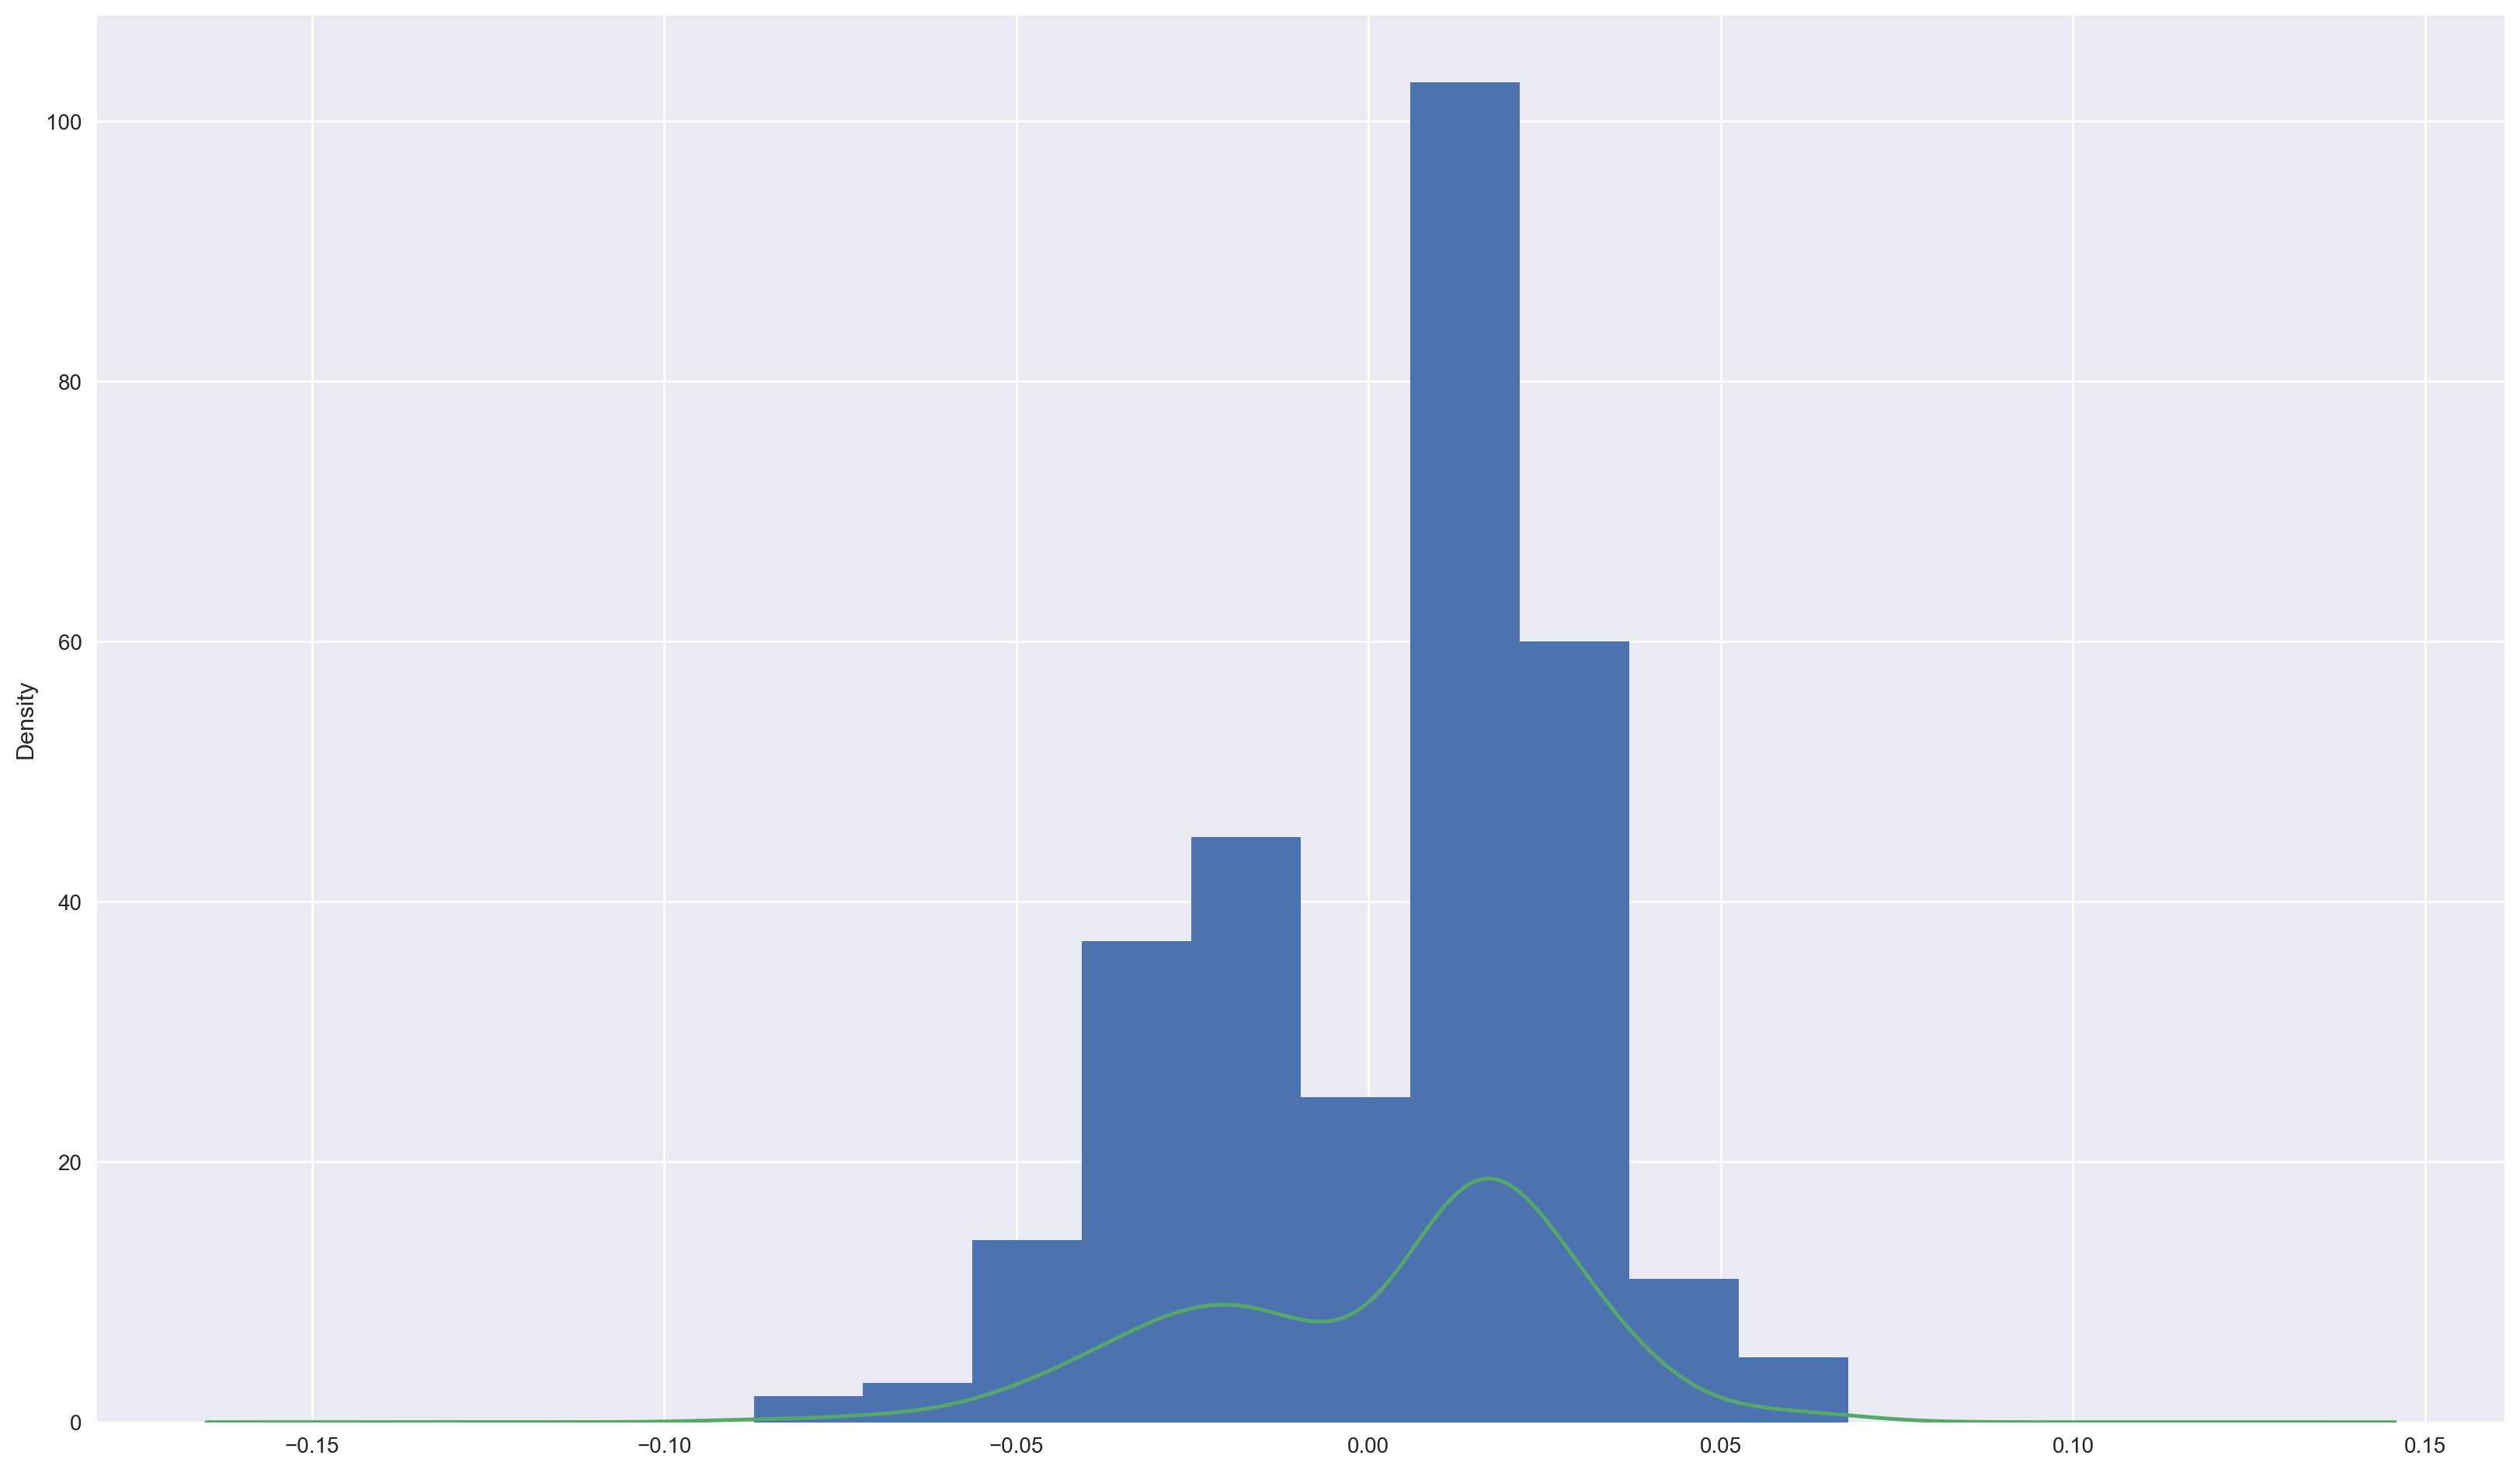

In [31]:
pd.Series(return_list).plot(kind='hist')
pd.Series(return_list).plot(kind='kde')

In [ ]:
#These parts are irrelevant --actual project finishes above

def history_buildup():
    mean_return = []
    total_signals  = []
    mean_return_total_signals =[]
    return_per_days = []
    test = []
    rolling_first_criteria = []
    std = []
    std1 = []
    rolling_second_criteria = []
    std_long = []
    take_profit = []
    days_rolling = []
    deviation = []
    max_drawdown = []
    mean_std = []



    g['history'] = []
    history.append(mean_return)
    history.append(total_signals)
    history.append(mean_return_total_signals)
    history.append(return_per_days)
    history.append(test)
    history.append(rolling_first_criteria)
    history.append(std)
    history.append(std1)
    history.append(rolling_second_criteria )
    history.append(std_long)
    history.append(take_profit)
    history.append(days_rolling)
    history.append(deviation)
    history.append(max_drawdown)
    history.append(mean_std)
    
def history_addup():
    history[0].append(all_returns.mean())
    history[1].append(len(days_for_trade))
    history[2].append(all_returns.mean()*len(days_for_trade))
    history[3].append(all_returns.mean()/total_days_in_hand.mean())                                        
    history[4].append(test)
    history[5].append(rolling_first_criteria)
    history[6].append(std)
    history[7].append(std1)
    history[8].append(rolling_second_criteria)
    history[9].append(std_long)
    history[10].append(take_profit)
    history[11].append(days_rolling)
    history[12].append(deviation)
    history[13].append(max_drawdown)
    history[14].append(mean_std)

In [ ]:
from math import gcd 
from functools import reduce
    
def lcm(denominators):
    return reduce(lambda a,b: a*b // gcd(a,b), denominators)
    
def myround(x, base=50):
    x = int(x)
    return base * round(x/base)

In [ ]:
#mean_return= 0.007078008081155179, total signals= 40, mean_return*total_signals= 0.2831203232462072, return per days= 0.0012099159113085776, test= 45, rolling_first_criteria= 20, std= 1, std1= 1.8, rolling_second_criteria= 45, std_long= 0.5, take_profit= 20, days_rolling= 20, deviation= 2, max_drawdown= -0.04787312057273829, mean/std= 0.25603513321615146

In [ ]:

'''
#1ocak2019-28mayıs2020
mean_return= 0.01643853325443296, total signals= 40, mean_return*total_signals= 0.6575413301773183, return per days= 0.0023400047337271113, test= 45, rolling_first_criteria= 20, std= 1, std1= 1.8, rolling_second_criteria= 45, std_long= 0.5, take_profit= 20, days_rolling= 20, deviation= 2.2, max_drawdown= -0.0943704097191771, mean/std= 0.5672189034463122
mean_return= 0.01775050187528941, total signals= 40, mean_return*total_signals= 0.7100200750115764, return per days= 0.0028629841734337754, test= 45, rolling_first_criteria= 20, std= 1, std1= 1.8, rolling_second_criteria= 45, std_long= 0.5, take_profit= 20, days_rolling= 20, deviation= 2, max_drawdown= -0.04273416331350499, mean/std= 0.7891394927852269
mean_return= 0.013637245786403523, total signals= 44, mean_return*total_signals= 0.600038814601755, return per days= 0.001973811890137352, test= 45, rolling_first_criteria= 20, std= 1, std1= 1.8, rolling_second_criteria= 45, std_long= 0.25, take_profit= 20, days_rolling= 20, deviation= 2.2, max_drawdown= -0.0943704097191771, mean/std= 0.46636154199084445
mean_return= 0.014829944532636662, total signals= 44, mean_return*total_signals= 0.6525175594360131, return per days= 0.002407813872457613, test= 45, rolling_first_criteria= 20, std= 1, std1= 1.8, rolling_second_criteria= 45, std_long= 0.25, take_profit= 20, days_rolling= 20, deviation= 2, max_drawdown= -0.04273416331350499, mean/std= 0.6271321673831957

######################
mean_return= 0.005542082557941073, total signals= 139, mean_return*total_signals= 0.7703494755538092, return per days= 0.0010567208169462402, test= 45, rolling_first_criteria= 20, std= 1.1, std1= 1.8, rolling_second_criteria= 45, std_long= 0.5, take_profit= 20, days_rolling= 20, deviation= 2, max_drawdown= -0.04787312057273829, mean/std= 0.26373929753741016
mean_return= 0.004884081652597299, total signals= 159, mean_return*total_signals= 0.7765689827629706, return per days= 0.0009611002261917953, test= 45, rolling_first_criteria= 20, std= 1.1, std1= 1.8, rolling_second_criteria= 45, std_long= 0, take_profit= 20, days_rolling= 20, deviation= 2, max_drawdown= -0.04787312057273829, mean/std= 0.24113771544235169
mean_return= 0.004896559416613374, total signals= 155, mean_return*total_signals= 0.758966709575073, return per days= 0.0009643795547332566, test= 45, rolling_first_criteria= 20, std= 1, std1= 1.8, rolling_second_criteria= 45, std_long= 0.5, take_profit= 20, days_rolling= 20, deviation= 2, max_drawdown= -0.04787312057273829, mean/std= 0.2372174987461571
mean_return= 0.003946940432413121, total signals= 179, mean_return*total_signals= 0.7065023374019487, return per days= 0.0007789441426702853, test= 45, rolling_first_criteria= 20, std= 1, std1= 1.8, rolling_second_criteria= 45, std_long= 0, take_profit= 20, days_rolling= 20, deviation= 2, max_drawdown= -0.04787312057273829, mean/std= 0.19930711771009468

'''

In [ ]:
def loop_function(start, end):
    g['all_returns_']=[]
    g['days_for_trade_']=[]
    g['total_days_in_hand_']=[]
    delete_last=-10
                                        
    for day in range(start, end):
        g['day'] = day

        g['forward_days'] = 60
        backtest_func(portfolios_to_trade, day)
        forward_func(portfolios_to_trade, day, forward_days)
        test_func_regression(portfolios_to_trade)
        ad_fuller(filtered_backtests, test)
        bollinger(ad_filter, rolling_first_criteria, std, std1, rolling_second_criteria, std_long)
    
        if len(bol_filter) == 0:
        
            test_func_johansen(portfolios_to_trade)
            ad_fuller(filtered_backtests, test)
            bollinger(ad_filter, rolling_first_criteria, std, std1, rolling_second_criteria, std_long)
        
            if len(bol_filter) == 0:
                continue
        
            else:
                find_index(bol_filter)
                forward_test_johansen(i, take_profit, days_rolling, deviation)
                all_returns_.append(return1)
                days_for_trade_.append(day)
                total_days_in_hand_.append(index+1)
                                    
                if (len(days_for_trade_) <1):
                    print('day{}, johansen{} generates {} return until __{}th day__'.format(days_for_trade_[-1], i, all_returns_[-1], total_days_in_hand_[-1]))
                    continue
                    
                if (len(days_for_trade_) >= 1):
                
                    if (i == delete_last):
                        days_for_trade_.pop(-1)
                        total_days_in_hand_.pop(-1)
                        all_returns_.pop(-1)    
                    else:
                        print('day{}, johansen{} generates {} return until __{}th day__'.format(days_for_trade_[-1], i, all_returns_[-1], total_days_in_hand_[-1]))
                        #plot_func()
                        delete_last=i
                        continue
        else:
            find_index(bol_filter)
            forward_test_regression(i, take_profit, days_rolling, deviation)
            all_returns_.append(return1)
            days_for_trade_.append(day)
            total_days_in_hand_.append(index+1)
        
            if (len(days_for_trade_) <1):
                print('day{}, regression{} generates {} return until __{}th day__'.format(days_for_trade_[-1], i, all_returns_[-1], total_days_in_hand_[-1]))
                continue
        
            if (len(days_for_trade_) >= 1):
                
                if (i == delete_last):
                        days_for_trade_.pop(-1)
                        total_days_in_hand_.pop(-1)
                        all_returns_.pop(-1)                    
                else:
                    print('day{}, regression{} generates {} return until __{}th day__'.format(days_for_trade_[-1], i, all_returns_[-1], total_days_in_hand_[-1]))
                    #plot_func()
                    delete_last=i
                    continue                     
                                    
    g['days_for_trade'] = pd.Series(days_for_trade_)
    g['total_days_in_hand'] = pd.Series(total_days_in_hand_)
    g['all_returns'] = pd.Series(all_returns_)
    
    
                                        
    g['max_drawdown'] = all_returns.min()  
    g['mean_std'] = all_returns.mean()/all_returns.std()
    print('mean_return= {}, total signals= {}, mean_return*total_signals= {}, return per days= {}, test= {}, rolling_first_criteria= {}, std= {}, std1= {}, rolling_second_criteria= {}, std_long= {}, take_profit= {}, days_rolling= {}, deviation= {}, max_drawdown= {}, mean/std= {}\n'.format(all_returns.mean(), len(days_for_trade), all_returns.mean()*len(days_for_trade), all_returns.mean()/total_days_in_hand.mean(), test, rolling_first_criteria, std, std1, rolling_second_criteria, std_long, take_profit, days_rolling, deviation, max_drawdown, mean_std))
    
    history_addup()   

In [ ]:
def easy_loop_function(start, end):
    g['all_returns_']=[]
    g['days_for_trade_']=[]
    g['total_days_in_hand_']=[]
    delete_last=-10
                                        
    for day in range(start, end):
        g['day'] = day
        g['forward_days'] = 60
        backtest_func(portfolios_to_trade, day)
        forward_func(portfolios_to_trade, day, forward_days)
        test_func_regression(portfolios_to_trade)
        ad_fuller(filtered_backtests, test)
        bollinger(ad_filter, rolling_first_criteria, std, std1, rolling_second_criteria, std_long)
    
        if len(bol_filter) == 0:
        
            test_func_johansen(portfolios_to_trade)
            ad_fuller(filtered_backtests, test)
            bollinger(ad_filter, rolling_first_criteria, std, std1, rolling_second_criteria, std_long)
        
            if len(bol_filter) == 0:
                continue
        
            else:          
                find_index(bol_filter)
                if (len(portfolios_to_trade[int(i)][0]) <= 2) & (len(portfolios_to_trade[int(i)][1]) <= 2):
                    forward_test_johansen(i, take_profit, days_rolling, deviation)
                    all_returns_.append(return1)
                    days_for_trade_.append(day)
                    total_days_in_hand_.append(index+1)
                                    
                    if (len(days_for_trade_) <1):
                        print('day{}, johansen{} generates {} return until __{}th day__'.format(days_for_trade_[-1], i, all_returns_[-1], total_days_in_hand_[-1]))
                        continue
                    
                    if (len(days_for_trade_) >= 1):
                
                        if (i == delete_last):
                            days_for_trade_.pop(-1)
                            total_days_in_hand_.pop(-1)
                            all_returns_.pop(-1)    
                        else:
                            print('day{}, johansen{} generates {} return until __{}th day__'.format(days_for_trade_[-1], i, all_returns_[-1], total_days_in_hand_[-1]))
                            #plot_func()
                            delete_last=i
                g['bol_filter'] = []
                del g['beta'] 
                        
        else:
            find_index(bol_filter)
            if (len(portfolios_to_trade[int(i)][0]) <= 2) & (len(portfolios_to_trade[int(i)][1]) <= 2):
                forward_test_regression(i, take_profit, days_rolling, deviation)
                all_returns_.append(return1)
                days_for_trade_.append(day)
                total_days_in_hand_.append(index+1)
        
                if (len(days_for_trade_) <1):
                    print('day{}, regression{} generates {} return until __{}th day__'.format(days_for_trade_[-1], i, all_returns_[-1], total_days_in_hand_[-1]))
                    continue
        
                if (len(days_for_trade_) >= 1):
                
                    if (i == delete_last):
                        days_for_trade_.pop(-1)
                        total_days_in_hand_.pop(-1)
                        all_returns_.pop(-1)                    
                    else:
                        print('day{}, regression{} generates {} return until __{}th day__'.format(days_for_trade_[-1], i, all_returns_[-1], total_days_in_hand_[-1]))
                        #plot_func()
                        delete_last=i
            g['bol_filter'] = []
            del g['beta']                   
                                    
    g['days_for_trade'] = pd.Series(days_for_trade_)
    g['total_days_in_hand'] = pd.Series(total_days_in_hand_)
    g['all_returns'] = pd.Series(all_returns_)
    
    
                                        
    g['max_drawdown'] = all_returns.min()  
    g['mean_std'] = all_returns.mean()/all_returns.std()
    print('mean_return= {}, total signals= {}, mean_return*total_signals= {}, return per days= {}, test= {}, rolling_first_criteria= {}, std= {}, std1= {}, rolling_second_criteria= {}, std_long= {}, take_profit= {}, days_rolling= {}, deviation= {}, max_drawdown= {}, mean/std= {}\n'.format(all_returns.mean(), len(days_for_trade), all_returns.mean()*len(days_for_trade), all_returns.mean()/total_days_in_hand.mean(), test, rolling_first_criteria, std, std1, rolling_second_criteria, std_long, take_profit, days_rolling, deviation, max_drawdown, mean_std))
    
    history_addup()   

In [ ]:
def subs_function(start, end):
        
    all_returns_=[]
    days_for_trade_=[]
    total_days_in_hand_=[]
    delete_last=-10
    for day in range(start, end):
        g['day'] = day
        
        if (day == end-1):
            backtest_func(portfolios_to_trade, day)
            forward_func(portfolios_to_trade, day, forward_days)
            test_func_regression(portfolios_to_trade)
            ad_fuller(filtered_backtests, test)
            bollinger(ad_filter, rolling_first_criteria, std, std1, rolling_second_criteria, std_long)
            
            if len(bol_filter) == 0:

                test_func_johansen(portfolios_to_trade)
                ad_fuller(filtered_backtests, test)
                bollinger(ad_filter, rolling_first_criteria, std, std1, rolling_second_criteria, std_long)
                
                if len(bol_filter) == 0:
                    continue
                    
                else:
                    find_index(bol_filter)
                    if (len(portfolios_to_trade[int(i)][0]) <= 2) & (len(portfolios_to_trade[int(i)][1]) <= 2):
                        if (i==delete_last):
                            break
                        else:
                            print('\n\nOpen New Position..')
                            print('Position opened on day: ', day)
                            print('Position opened on time: ', bank.index[day][1].date())
                            print('------------------------------------------------')
                            longs = ''
                            for stock in range(len(portfolios_to_trade[int(i)][0])):
                                if stock>0:
                                    longs += ', {}'.format(portfolios_to_trade[int(i)][0][stock].upper())
                                    longs += '({})'.format(bank_prices[portfolios_to_trade[int(i)][0][stock]][day+2])
                                else: 
                                    longs += portfolios_to_trade[int(i)][0][stock].upper()
                                    longs += '({})'.format(bank_prices[portfolios_to_trade[int(i)][0][stock]][day+2])
                            print('   Long stocks: ', round(longs,2))
                        
                            shorts = ''
                            for stock in range(len(portfolios_to_trade[int(i)][1])):
                                if stock>0:
                                    shorts += ', {}'.format(portfolios_to_trade[int(i)][1][stock].upper())
                                    shorts += '({})'.format(bank_prices[portfolios_to_trade[int(i)][1][stock]][day+2])
                                else: 
                                    shorts += portfolios_to_trade[int(i)][1][stock].upper()     
                                    shorts += '({})'.format(bank_prices[portfolios_to_trade[int(i)][1][stock]][day+2])
                            print('   Short stocks: ', round(shorts,2)
                            print('beta: ', round(beta,6))
                            open_email(longs, shorts)
                            break
            
            else:
                find_index(bol_filter)
                if (len(portfolios_to_trade[int(i)][0]) <= 2) & (len(portfolios_to_trade[int(i)][1]) <= 2):
                    if (i==delete_last):
                        break
                    else:
                        print('\n\nOpen New Position..')
                        print('Position opened on day: ', day)
                        print('Position opened on time: ', bank.index[day][1].date())
                        print('------------------------------------------------')
                        longs = ''
                        for stock in range(len(portfolios_to_trade[int(i)][0])):
                            if stock>0:
                                longs += ', {}'.format(portfolios_to_trade[int(i)][0][stock].upper())
                                longs += '({})'.format(bank_prices[portfolios_to_trade[int(i)][0][stock]][day+2])
                            else: 
                                longs += portfolios_to_trade[int(i)][0][stock].upper()
                                longs += '({})'.format(bank_prices[portfolios_to_trade[int(i)][0][stock]][day+2])
                        print('   Long stocks: ', round(longs,2)
                        
                        shorts = ''
                        for stock in range(len(portfolios_to_trade[int(i)][1])):
                            if stock>0:
                                shorts += ', {}'.format(portfolios_to_trade[int(i)][1][stock].upper())
                                shorts += '({})'.format(bank_prices[portfolios_to_trade[int(i)][1][stock]][day+2])
                            else: 
                                shorts += portfolios_to_trade[int(i)][1][stock].upper()     
                                shorts += '({})'.format(bank_prices[portfolios_to_trade[int(i)][1][stock]][day+2])
                        print('   Short stocks: ', round(shorts,2)
                        print('beta: ', round(beta,6))
                        open_email(longs, shorts)
                        break

        g['forward_days'] = 60
        backtest_func(portfolios_to_trade, day)
        forward_func(portfolios_to_trade, day, forward_days)
        test_func_regression(portfolios_to_trade)
        ad_fuller(filtered_backtests, test)
        bollinger(ad_filter, rolling_first_criteria, std, std1, rolling_second_criteria, std_long)
    
        if len(bol_filter) == 0:
        
            test_func_johansen(portfolios_to_trade)
            ad_fuller(filtered_backtests, test)
            bollinger(ad_filter, rolling_first_criteria, std, std1, rolling_second_criteria, std_long)
        
            if len(bol_filter) == 0:
                continue
        
            else:
                find_index(bol_filter)
                if (len(portfolios_to_trade[int(i)][0]) <= 2) & (len(portfolios_to_trade[int(i)][1]) <= 2):
                    forward_test_johansen(i, take_profit, days_rolling, deviation)
                    all_returns_.append(return1)
                    days_for_trade_.append(day)
                    total_days_in_hand_.append(index+1)
                
                    if (len(days_for_trade_) ==1):
                        print('\nClose position of recent trade..\n')
                        print('Position opened on day: ', day)
                        print('Position opened on time:, ', bank.index[day][1].date())
                        print('Position closed on day: ', day+index+1)
                        print('Position closed on time: ', bank.index[day+index+1][1].date())
                        stocks_=''
                        print('------------------------------------------------')
                        
                        longs = ''
                        for stock in range(len(portfolios_to_trade[int(i)][0])):
                            if stock>0:
                                longs += ', {}'.format(portfolios_to_trade[int(i)][0][stock].upper())
                                longs += '({})'.format(bank_prices[portfolios_to_trade[int(i)][0][stock]][day+index+2])
                            else: 
                                longs += portfolios_to_trade[int(i)][0][stock].upper()
                                longs += '({})'.format(bank_prices[portfolios_to_trade[int(i)][0][stock]][day+index+2])
                        print('   Long stocks: ', round(longs, 2)
                        
                        shorts = ''
                        for stock in range(len(portfolios_to_trade[int(i)][1])):
                            if stock>0:
                                shorts += ', {}'.format(portfolios_to_trade[int(i)][1][stock].upper())
                                shorts += '({})'.format(bank_prices[portfolios_to_trade[int(i)][1][stock]][day+index+2])
                            else: 
                                shorts += portfolios_to_trade[int(i)][1][stock].upper()     
                                shorts += '({})'.format(bank_prices[portfolios_to_trade[int(i)][1][stock]][day+index+2])
                        print('   Short stocks: ', round(shorts, 2)
                        print('beta: ', round(beta,6))
                        print('total days position stayed open: ', index+1)
                        if return1 > 0:
                            print('      profit for the position :', round(return1,3))
                        if return1 < 0:
                            print('      loss for the position :', round(return1,3))
                        delete_last=i
                    
                        if ((day+index)==(end-1)):
                            close_email(longs, shorts)                         
                        continue
                    
                    if (len(days_for_trade_) > 1):
                
                        if (i == delete_last):
                            days_for_trade_.pop(-1)
                            total_days_in_hand_.pop(-1)
                            all_returns_.pop(-1)  
                            continue
                        
                        elif g['turn_on'] == 1:
                            print('\nClose position of recent trade..\n')
                            print('Position opened on day: ', day)
                            print('Position opened on time: ', bank.index[day][1].date())
                            print('Position closed on day: ', day+index+1)
                            print('Position closed on time: ', bank.index[day+index+1][1].date())
                            print('------------------------------------------------')
                            longs = ''
                            for stock in range(len(portfolios_to_trade[int(i)][0])):
                                if stock>0:
                                    longs += ', {}'.format(portfolios_to_trade[int(i)][0][stock].upper())
                                    longs += '({})'.format(bank_prices[portfolios_to_trade[int(i)][0][stock]][day+index+2])
                                else: 
                                    longs += portfolios_to_trade[int(i)][0][stock].upper()
                                    longs += '({})'.format(bank_prices[portfolios_to_trade[int(i)][0][stock]][day+index+2])
                            print('   Long stocks: ', round(longs, 2)
                        
                            shorts = ''
                            for stock in range(len(portfolios_to_trade[int(i)][1])):
                                if stock>0:
                                    shorts += ', {}'.format(portfolios_to_trade[int(i)][1][stock].upper())
                                    shorts += '({})'.format(bank_prices[portfolios_to_trade[int(i)][1][stock]][day+index+2])
                                else: 
                                    shorts += portfolios_to_trade[int(i)][1][stock].upper()     
                                    shorts += '({})'.format(bank_prices[portfolios_to_trade[int(i)][1][stock]][day+index+2])
                            print('   Short stocks: ', round(shorts, 2)
                            print('beta: ', round(beta,6))
                            print('total days position stayed open: ', index+1)
                            if return1 > 0:
                                print('      profit for the position:', round(return1,3))
                            if return1 < 0:
                                print('      loss for the position:', round(return1,3))
                            delete_last=i
                            
                            if ((day+index)==(end-1)):
                                close_email(longs, shorts) 
                            #plot_func()
            g['bol_filter'] = []
            del g['beta'] 

        else:
            find_index(bol_filter)
            if (len(portfolios_to_trade[int(i)][0]) <= 2) & (len(portfolios_to_trade[int(i)][1]) <= 2):
                forward_test_regression(i, take_profit, days_rolling, deviation)
                all_returns_.append(return1)
                days_for_trade_.append(day)
                total_days_in_hand_.append(index+1)
        
                if (len(days_for_trade_) ==1):  
                
                    print('\nClose position of recent trade..\n')
                    print('Position opened on day: ', day)
                    print('Position opened on time: ', bank.index[day][1].date())
                    print('Position closed on day: ', day+index+1)
                    print('Position closed on time: ', bank.index[day+index+1][1].date())
                    print('------------------------------------------------')
                    longs = ''
                    for stock in range(len(portfolios_to_trade[int(i)][0])):
                        if stock>0:
                            longs += ', {}'.format(portfolios_to_trade[int(i)][0][stock].upper())
                            longs += '({})'.format(bank_prices[portfolios_to_trade[int(i)][0][stock]][day+index+2])
                        else: 
                            longs += portfolios_to_trade[int(i)][0][stock].upper()
                            longs += '({})'.format(bank_prices[portfolios_to_trade[int(i)][0][stock]][day+index+2])
                    print('   Long stocks: ', round(longs, 2)
                        
                    shorts = ''
                    for stock in range(len(portfolios_to_trade[int(i)][1])):
                        if stock>0:
                            shorts += ', {}'.format(portfolios_to_trade[int(i)][1][stock].upper())
                            shorts += '({})'.format(bank_prices[portfolios_to_trade[int(i)][1][stock]][day+index+2])
                        else: 
                            shorts += portfolios_to_trade[int(i)][1][stock].upper()     
                            shorts += '({})'.format(bank_prices[portfolios_to_trade[int(i)][1][stock]][day+index+2])
                    print('   Short stocks: ', round(shorts, 2)
                    print('beta: ', round(beta,6))
                    print('total days position stayed open: ', index+1)
                    if return1 > 0:
                        print('      profit for the position:', round(return1,3))
                    if return1 < 0:
                        print('      loss for the position:', round(return1,3))
                    delete_last=i
                    
                    if ((day+index)==(end-1)):
                        close_email(longs, shorts)                            
                        continue
        
                if (len(days_for_trade_) > 1):
                    if (i == delete_last):
                        days_for_trade_.pop(-1)
                        total_days_in_hand_.pop(-1)
                        all_returns_.pop(-1)   
                        continue
                        
                    elif g['turn_on'] == 1:
                        print('\nClose position of recent trade..\n')
                        print('Position opened on day: ', day)
                        print('Position opened on time: ', bank.index[day][1].date())
                        print('Position closed on day: ', day+index+1)
                        print('Position closed on time: ', bank.index[day+index+1][1].date())
                        print('------------------------------------------------')
                        longs = ''
                        for stock in range(len(portfolios_to_trade[int(i)][0])):
                            if stock>0:
                                longs += ', {}'.format(portfolios_to_trade[int(i)][0][stock].upper())
                                longs += '({})'.format(bank_prices[portfolios_to_trade[int(i)][0][stock]][day+index+2])
                            else: 
                                longs += portfolios_to_trade[int(i)][0][stock].upper()
                                longs += '({})'.format(bank_prices[portfolios_to_trade[int(i)][0][stock]][day+index+2])
                        print('   Long stocks: ', round(longs, 2)
                        
                        shorts = ''
                        for stock in range(len(portfolios_to_trade[int(i)][1])):
                            if stock>0:
                                shorts += ', {}'.format(portfolios_to_trade[int(i)][1][stock].upper())
                                shorts += '({})'.format(bank_prices[portfolios_to_trade[int(i)][1][stock]][day+index+2])
                            else: 
                                shorts += portfolios_to_trade[int(i)][1][stock].upper()     
                                shorts += '({})'.format(bank_prices[portfolios_to_trade[int(i)][1][stock]][day+index+2])
                        print('   Short stocks: ', round(shorts, 2))
                        print('beta: ', round(beta,3))
                        print('total days position stayed open: ', index+1)
                        if return1 > 0:
                            print('      profit for the position: ', round(return1,3))
                        if return1 < 0:
                            print('      loss for the position: ', round(return1,3))
                        delete_last=i  
                        if ((day+index)==(end-1)):
                            close_email(longs, shorts)
                        #plot_func()
            g['bol_filter'] = []
            del g['beta'] 